<div style="border-radius: 15px; border: 2px solid #6A1B9A; padding: 20px; background: linear-gradient(135deg, #f1a0a1, #4c7cba); text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); font-weight: bold; margin-bottom: 10px; font-size: 36px; font-family: 'Roboto', sans-serif;">
        🫁 Lung Cancer Detection: Models & Insights 🩺📊
    </h1>
</div>

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">


### **📊 Dataset Overview**

The dataset focuses on **lung cancer detection** 🫁 by analyzing **demographic**, **behavioral**, and **medical** features of individuals. It aims to identify **risk factors** and **symptoms** associated with lung cancer, providing valuable insights for **early diagnosis** 🩺.

- **📂 Number of Instances**: 284  
- **📝 Number of Attributes**: 16 (including the target variable `LUNG_CANCER`)  
- **📋 Attribute Categories**:  
  - **👤 Demographic**: Gender, Age  
  - **🚬 Behavioral**: Smoking, Alcohol Consumption, Peer Pressure  
  - **🩺 Medical/Symptoms**: Yellow Fingers, Anxiety, Fatigue, Allergy, Wheezing, Coughing, Shortness of Breath, Swallowing Difficulty, Chest Pain  
- **🎯 Target Variable**: `LUNG_CANCER` (Binary: YES/NO)  

### **🎯 Objectives**

**1. 🔍 Prediction of Lung Cancer Risk**  
- Build machine learning models to classify individuals as having lung cancer (`YES`) or not (`NO`) based on the features.

**2. 🧠 Feature Importance Analysis**  
- Identify the most significant features (e.g., symptoms or behaviors) contributing to lung cancer predictions.

**3. 📈 Model Performance Evaluation**  
- Compare multiple machine learning algorithms (e.g., Logistic Regression, Random Forest, SVC) to identify the most accurate and robust model for this dataset.

**4. ⚖️ Handle Class Imbalance**  
- Address the imbalance in the target variable using techniques like **ADASYN** to improve the model's ability to detect minority cases.


<div style="border-radius: 15px; border: 2px solid #6A1B9A; padding: 10px; background: linear-gradient(135deg, #f1a0a1, #4c7cba); text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); font-weight: bold; margin-bottom: 5px; font-size: 28px; font-family: 'Roboto', sans-serif;">
        Import Libraries
    </h1>
</div>

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, accuracy_score, classification_report
from sklearn.ensemble import VotingClassifier
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

# <span style="color:transparent;">Data Loading and Initial Exploration</span>

<div style="border-radius: 15px; border: 2px solid #6A1B9A; padding: 10px; background: linear-gradient(135deg, #f1a0a1, #4c7cba); text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); font-weight: bold; margin-bottom: 5px; font-size: 28px; font-family: 'Roboto', sans-serif;">
        Data Loading and Initial Exploration
    </h1>
</div>

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">


In [2]:
# Load the dataset
df = pd.read_csv('survey lung cancer.csv')

In [3]:
# Display basic information about the dataset
print("Shape of the dataset:", df.shape)
display(df.head())
print("\nDataset Information:")
print(df.info())
print("\nStatistical Summary:")
display(df.describe().T)

Shape of the dataset: (309, 16)


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  L

,count,mean,std,min,25%,50%,75%,max
AGE,309.0,62.673139,8.210301,21.0,57.0,62.0,69.0,87.0
SMOKING,309.0,1.563107,0.496806,1.0,1.0,2.0,2.0,2.0
YELLOW_FINGERS,309.0,1.569579,0.495938,1.0,1.0,2.0,2.0,2.0
ANXIETY,309.0,1.498382,0.500808,1.0,1.0,1.0,2.0,2.0
PEER_PRESSURE,309.0,1.501618,0.500808,1.0,1.0,2.0,2.0,2.0
CHRONIC DISEASE,309.0,1.504854,0.500787,1.0,1.0,2.0,2.0,2.0
FATIGUE,309.0,1.673139,0.469827,1.0,1.0,2.0,2.0,2.0
ALLERGY,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
WHEEZING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
ALCOHOL CONSUMING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0


#### **Insights from the Dataset**

#### General Information:
- **Shape**: The dataset contains **309 instances** and **16 attributes**.
- **Columns**: 
  - 2 categorical columns: `GENDER` and `LUNG_CANCER`.
  - 14 numeric columns representing features such as age, smoking, and other health-related conditions.
- **No Missing Values**: All columns have complete data.

#### Statistical Summary:
1. **Age**:
   - Mean age: **62.67 years**.
   - Range: **21 to 87 years**.
   - Majority of participants are above 57 years (25th percentile).

2. **Binary Features** (e.g., Smoking, Yellow Fingers, Anxiety):
   - Encoded as:
     - `YES = 2`
     - `NO = 1`.
   - Most features have a balanced distribution between `YES` and `NO`.

3. **Categorical Columns**:
   - `GENDER`: Contains values `M` (male) and `F` (female).
   - `LUNG_CANCER`: Indicates the presence of lung cancer (`YES` or `NO`).

#### Observations:
- **Balanced Binary Features**: Many binary attributes have mean values near 1.5, indicating a roughly equal split between `YES` and `NO`.
- **Potential Correlations**: Features like `SMOKING`, `WHEEZING`, `SHORTNESS OF BREATH`, and `CHEST PAIN` are likely to have strong relationships with the target (`LUNG_CANCER`).

# <span style="color:transparent;">Data Inspection and Understanding</span>

<div style="border-radius: 15px; border: 2px solid #6A1B9A; padding: 10px; background: linear-gradient(135deg, #f1a0a1, #4c7cba); text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); font-weight: bold; margin-bottom: 5px; font-size: 28px; font-family: 'Roboto', sans-serif;">
        Data Inspection and Understanding
    </h1>
</div>

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">


In [4]:
# Check for missing and duplicated values
print(f'\nMissing values: {df.isna().sum().sum()}')
print(f'Duplicated values: {df.duplicated().sum()}')


Missing values: 0
Duplicated values: 33


#### Insights on Missing and Duplicated Values:

1. **Missing Values**:
   - There are **no missing values** in the dataset. All data entries are complete.

2. **Duplicated Values**:
   - The dataset contains **33 duplicated rows**. These should be reviewed to determine if they are valid duplicates or if they should be removed to avoid bias in analysis or modeling.


In [5]:
# Extract duplicated rows
duplicated_rows = df[df.duplicated(keep=False)]
print("Duplicated Rows:")
display(duplicated_rows)

# Statistics for duplicated rows
duplicated_stats = duplicated_rows.describe(include='all').T

# Display the duplicated rows and their statistics
print("\nStatistics for Duplicated Rows:")
display(duplicated_stats)


Duplicated Rows:


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
13,M,58,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
23,M,60,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
51,M,63,2,2,2,1,2,2,2,2,1,1,2,1,1,YES
75,M,58,2,1,1,1,1,1,2,2,2,2,1,1,1,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES



Statistics for Duplicated Rows:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
GENDER,66,2,M,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE,66.0,NaN,NaN,NaN,60.69697,6.346337,47.0,56.0,61.0,64.0,76.0
SMOKING,66.0,NaN,NaN,NaN,1.727273,0.448775,1.0,1.0,2.0,2.0,2.0
YELLOW_FINGERS,66.0,NaN,NaN,NaN,1.515152,0.5036,1.0,1.0,2.0,2.0,2.0
ANXIETY,66.0,NaN,NaN,NaN,1.515152,0.5036,1.0,1.0,2.0,2.0,2.0
PEER_PRESSURE,66.0,NaN,NaN,NaN,1.454545,0.501745,1.0,1.0,1.0,2.0,2.0
CHRONIC DISEASE,66.0,NaN,NaN,NaN,1.363636,0.484732,1.0,1.0,1.0,2.0,2.0
FATIGUE,66.0,NaN,NaN,NaN,1.757576,0.431834,1.0,2.0,2.0,2.0,2.0
ALLERGY,66.0,NaN,NaN,NaN,1.636364,0.484732,1.0,1.0,2.0,2.0,2.0
WHEEZING,66.0,NaN,NaN,NaN,1.636364,0.484732,1.0,1.0,2.0,2.0,2.0


#### Insights on Duplicated Rows:

1. **Duplicated Rows**:
   - **Total Duplicated Rows**: 66 (33 unique duplicated rows).
   - These rows have identical values across all 16 columns.

2. **Key Statistics**:
   - **Demographics**:
     - `GENDER`: 60.6% are males (`M` is the mode).
     - `AGE`: Average age is **60.7**, with a range of **47 to 76** years.
   - **Risk Factors**:
     - High occurrence of `SMOKING` (average ~1.73, where `YES=2`).
     - Attributes such as `YELLOW_FINGERS`, `ANXIETY`, and `FATIGUE` have averages around **1.5–1.75**, indicating a tendency towards "YES."
   - **Target Variable**:
     - Majority of duplicated rows (64 out of 66) are classified as having `LUNG_CANCER` (`YES`).

3. **Observations**:
   - **Prevalence of Lung Cancer**:
     - A significant portion of the duplicated rows belong to patients classified as `YES` for lung cancer, which may indicate overrepresentation.
   - **Risk Correlation**:
     - Most duplicated rows show positive responses (`YES`) for multiple risk factors like smoking, fatigue, and yellow fingers.


In [6]:
# Display the original shape of the dataset
print("Original shape of the dataset:", df.shape)

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Verify the new shape of the dataset
print("New shape of the dataset after removing duplicates:", df.shape)


Original shape of the dataset: (309, 16)
New shape of the dataset after removing duplicates: (276, 16)


#### Dataset Shape After Removing Duplicates:

1. **Original Shape**: The dataset initially had **309 rows** and **16 columns**.
2. **New Shape**: After removing duplicates, the dataset now contains **276 rows** and **16 columns**.

A total of **33 duplicate rows** were removed, ensuring the dataset is free from redundant entries.

In [7]:
# Display the number of unique values in each column
print("\nUnique Values in Each Column:")
print(df.nunique())


Unique Values in Each Column:
GENDER                    2
AGE                      39
SMOKING                   2
YELLOW_FINGERS            2
ANXIETY                   2
PEER_PRESSURE             2
CHRONIC DISEASE           2
FATIGUE                   2
ALLERGY                   2
WHEEZING                  2
ALCOHOL CONSUMING         2
COUGHING                  2
SHORTNESS OF BREATH       2
SWALLOWING DIFFICULTY     2
CHEST PAIN                2
LUNG_CANCER               2
dtype: int64


#### Unique Values in Each Column:

1. **Binary Categorical Variables**:
   - Columns with 2 unique values (`YES=2, NO=1`):
     - `SMOKING`, `YELLOW_FINGERS`, `ANXIETY`, `PEER_PRESSURE`, `CHRONIC DISEASE`, `FATIGUE`, `ALLERGY`, `WHEEZING`, `ALCOHOL CONSUMING`, `COUGHING`, `SHORTNESS OF BREATH`, `SWALLOWING DIFFICULTY`, `CHEST PAIN`, `LUNG_CANCER`.

2. **Demographic Variables**:
   - `GENDER`: 2 unique values (`M` and `F`).
   - `AGE`: 39 unique values, indicating a wide range of distinct ages.

In [8]:
# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
non_numerical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Display the lists of numerical and categorical columns
print("Numerical Columns:", numerical_columns)
print("\nCategorical Columns:", non_numerical_columns)

Numerical Columns: ['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']

Categorical Columns: ['GENDER', 'LUNG_CANCER']


In [9]:
# Display unique values for each categorical column
for col in non_numerical_columns:
    print(f"\nColumn: {col}")
    print(f"Unique Values: {df[col].unique()}")


Column: GENDER
Unique Values: ['M' 'F']

Column: LUNG_CANCER
Unique Values: ['YES' 'NO']


# <span style="color:transparent;">Exploratory Data Analysis (EDA)</span>

<div style="border-radius: 15px; border: 2px solid #6A1B9A; padding: 10px; background: linear-gradient(135deg, #f1a0a1, #4c7cba); text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); font-weight: bold; margin-bottom: 5px; font-size: 28px; font-family: 'Roboto', sans-serif;">
        Exploratory Data Analysis (EDA)
    </h1>
</div>

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">


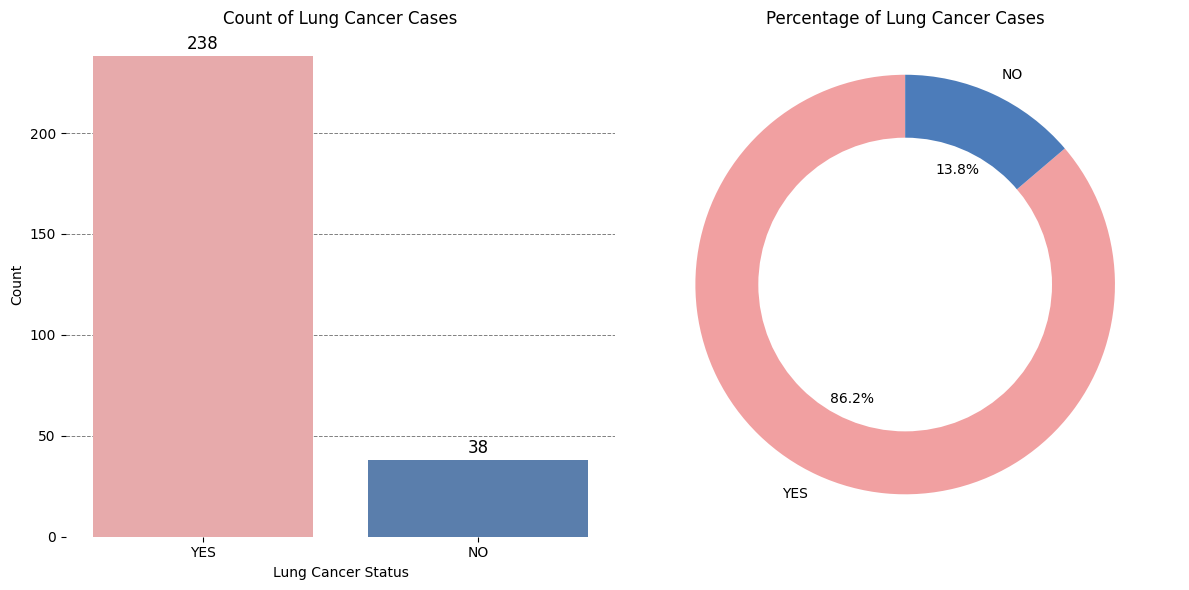

In [10]:
# Custom color palette
custom_palette = ['#f1a0a1', '#4c7cba']

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Count plot for 'LUNG_CANCER'
sns.countplot(x='LUNG_CANCER', data=df, ax=axes[0], palette=custom_palette)
axes[0].set_title('Count of Lung Cancer Cases')
axes[0].set_xlabel('Lung Cancer Status')
axes[0].set_ylabel('Count')

for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='baseline', 
                     color='black', fontsize=12, 
                     xytext=(0, 5), 
                     textcoords='offset points')

axes[0].set_axisbelow(True)  
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)  

sns.despine(left=True, bottom=True)

# Donut chart for 'LUNG_CANCER'
lung_cancer_counts = df['LUNG_CANCER'].value_counts()
wedges, texts, autotexts = axes[1].pie(
    lung_cancer_counts, 
    labels=lung_cancer_counts.index, 
    autopct='%1.1f%%', 
    startangle=90,
    colors=custom_palette
)

# Add a white circle to create a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

axes[1].set_title('Percentage of Lung Cancer Cases')
axes[1].axis('equal')

plt.tight_layout()
plt.show()


#### Insights from the Target Feature (LUNG_CANCER)

1. **Count Plot**:
   - The count plot shows the distribution of "YES" and "NO" cases for `LUNG_CANCER`.
   - The "YES" category appears to have a higher count compared to "NO."

2. **Donut Chart**:
   - The donut chart illustrates the proportion of cases:
     - A larger proportion of participants have been diagnosed with lung cancer ("YES").
     - A smaller percentage have not been diagnosed ("NO").

These visualizations confirm an imbalance in the target feature.

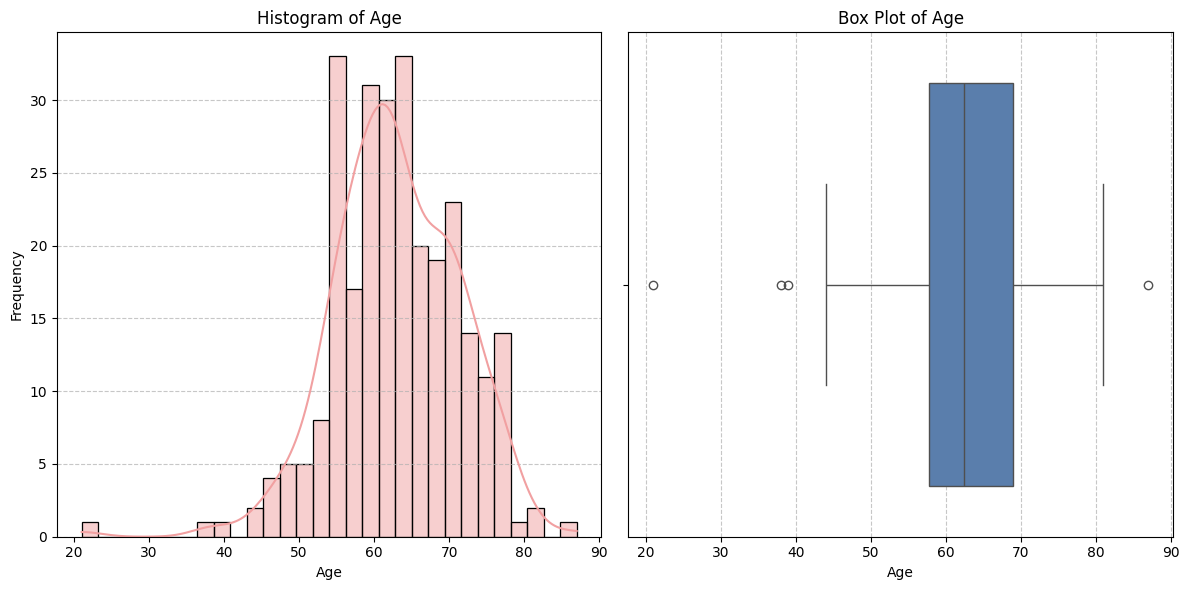

In [11]:
plt.figure(figsize=(12, 6))

# Histogram for 'AGE'
plt.subplot(1, 2, 1)
sns.histplot(df['AGE'], bins=30, color='#f1a0a1', kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(visible=True, axis='y', linestyle='--', alpha=0.7)

# Box plot for 'AGE'
plt.subplot(1, 2, 2)
sns.boxplot(x=df['AGE'], color='#4c7cba')
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.grid(visible=True, axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### Insights from the Age Distribution

1. **Histogram of Age**:
   - The age distribution is slightly **right-skewed**, with most individuals falling between **50 and 70 years**.
   - The distribution has a smooth peak, suggesting the dataset contains a significant number of individuals within the older age range.
   - There is a smaller proportion of younger individuals (e.g., under 40 years).

2. **Box Plot of Age**:
   - The median age is around **60 years**, consistent with the histogram.
   - The interquartile range (IQR) shows most ages fall between **56 and 69 years**.
   - A few potential outliers are visible on the lower end (ages below ~30).


In [12]:
# Replace numeric binary values with "YES" and "NO"
binary_columns = df.select_dtypes(include=['int64']).columns
df[binary_columns] = df[binary_columns].replace({2: "YES", 1: "NO"})

# Replace "M" and "F" with "Male" and "Female" in "GENDER" column
df['GENDER'] = df['GENDER'].replace({'M': "Male", 'F': "Female"})

# Verify the changes
df.head()

# Separate numerical and categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Display the lists of numerical and categorical columns
print("Categorical Columns:\n", categorical_columns)
for col in categorical_columns:
    print(f"\nColumn: {col}")
    print(f"Unique Values: {df[col].unique()}")

Categorical Columns:
 ['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']

Column: GENDER
Unique Values: ['Male' 'Female']

Column: SMOKING
Unique Values: ['NO' 'YES']

Column: YELLOW_FINGERS
Unique Values: ['YES' 'NO']

Column: ANXIETY
Unique Values: ['YES' 'NO']

Column: PEER_PRESSURE
Unique Values: ['NO' 'YES']

Column: CHRONIC DISEASE
Unique Values: ['NO' 'YES']

Column: FATIGUE 
Unique Values: ['YES' 'NO']

Column: ALLERGY 
Unique Values: ['NO' 'YES']

Column: WHEEZING
Unique Values: ['YES' 'NO']

Column: ALCOHOL CONSUMING
Unique Values: ['YES' 'NO']

Column: COUGHING
Unique Values: ['YES' 'NO']

Column: SHORTNESS OF BREATH
Unique Values: ['YES' 'NO']

Column: SWALLOWING DIFFICULTY
Unique Values: ['YES' 'NO']

Column: CHEST PAIN
Unique Values: ['YES' 'NO']

Column: LUNG_CANCER
Unique Values: ['YES' 'NO'

- The numeric binary values have been successfully replaced with "YES" and "NO", and the "GENDER" column has been updated with "Male" and "Female". This transformation will facilitate better visualizations during exploratory data analysis (EDA).

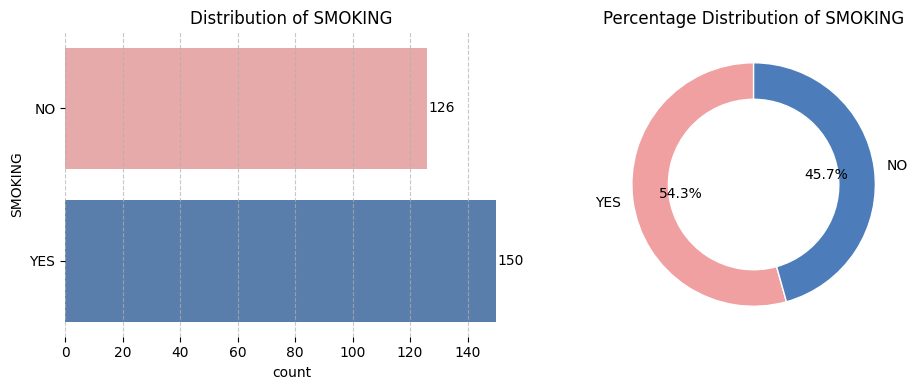

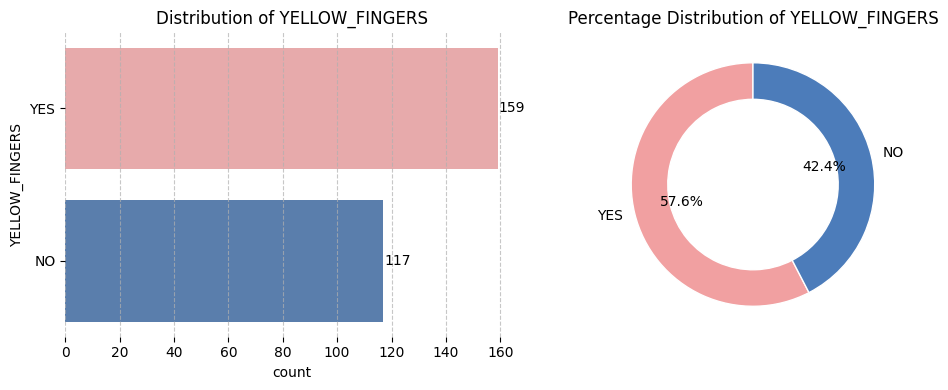

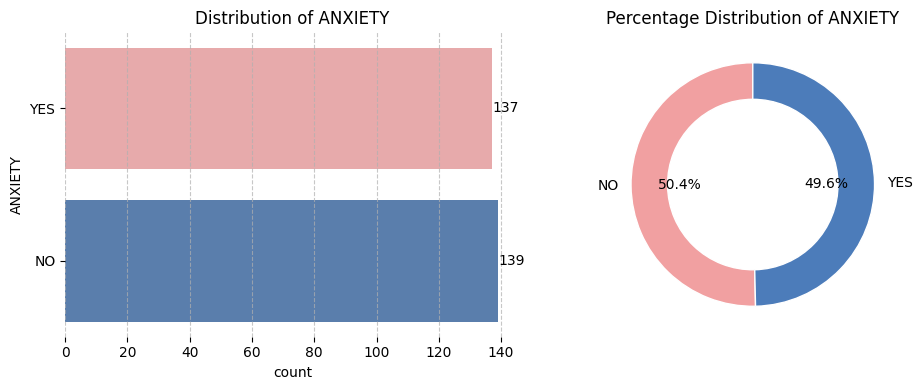

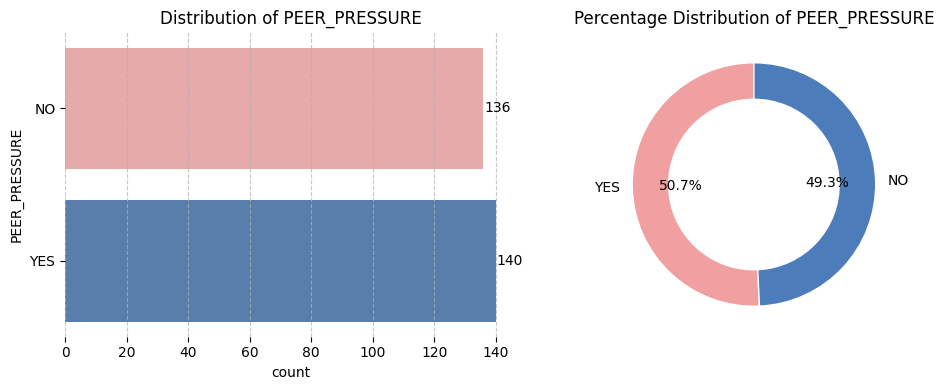

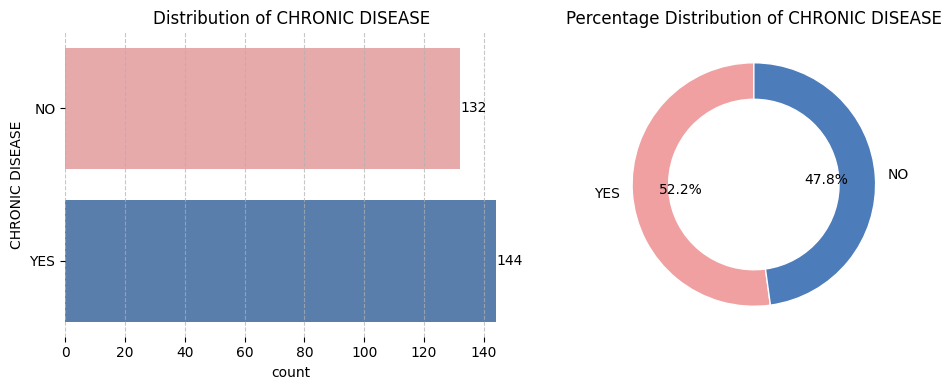

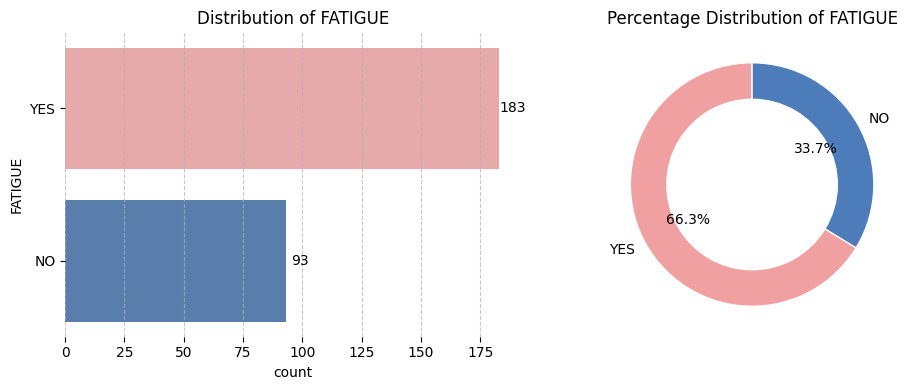

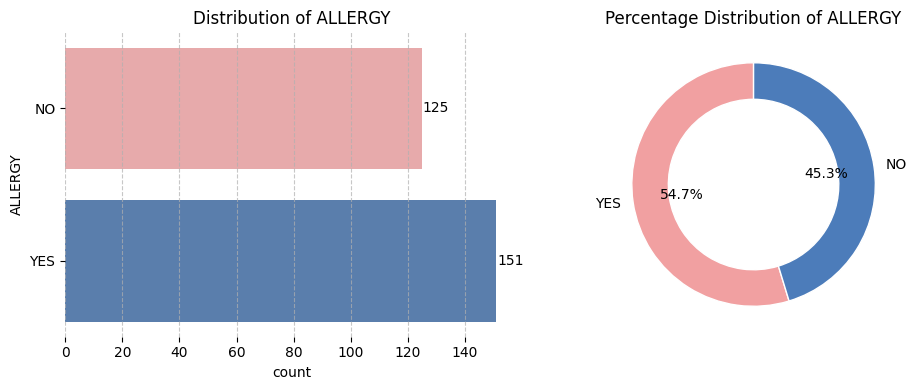

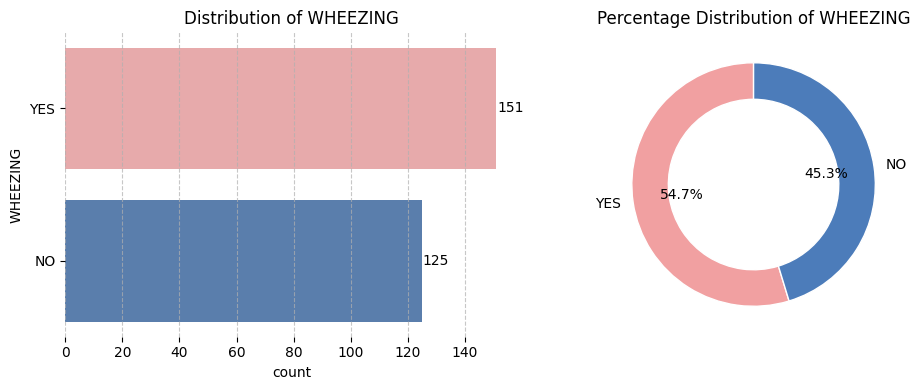

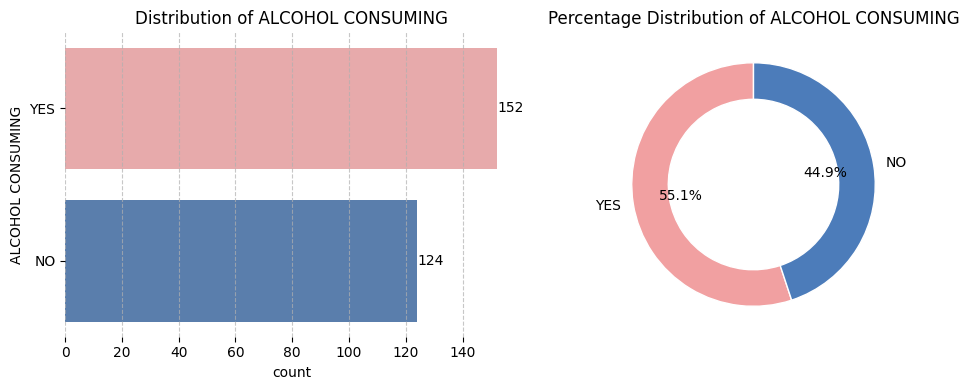

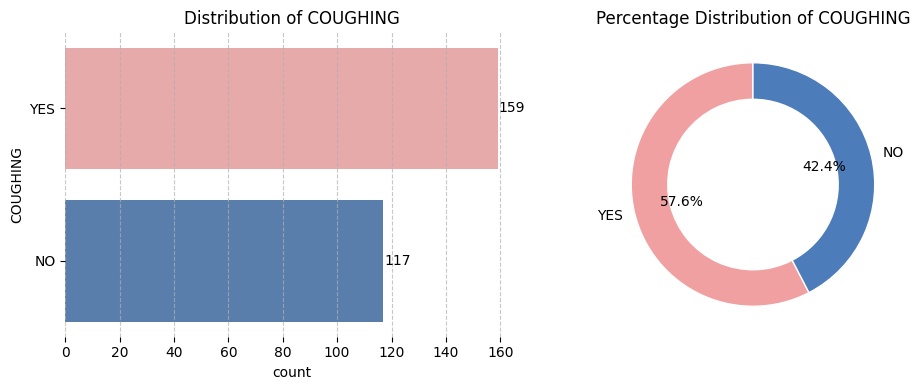

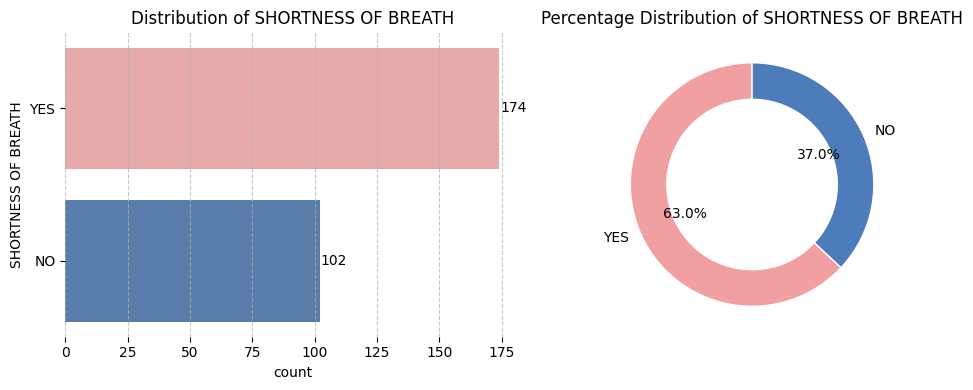

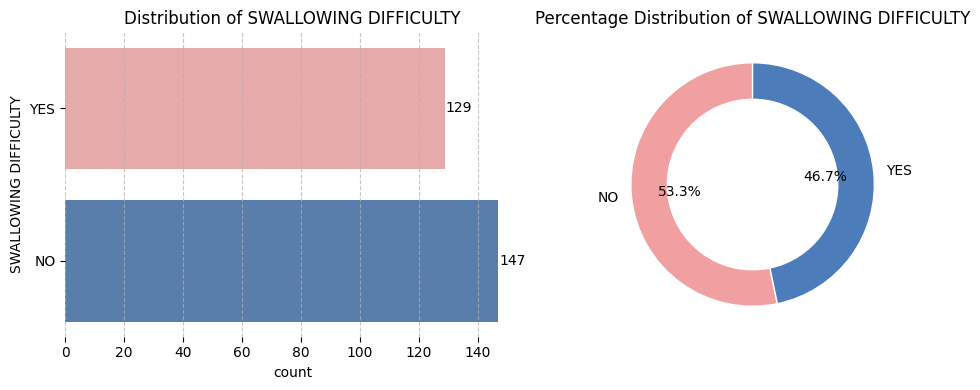

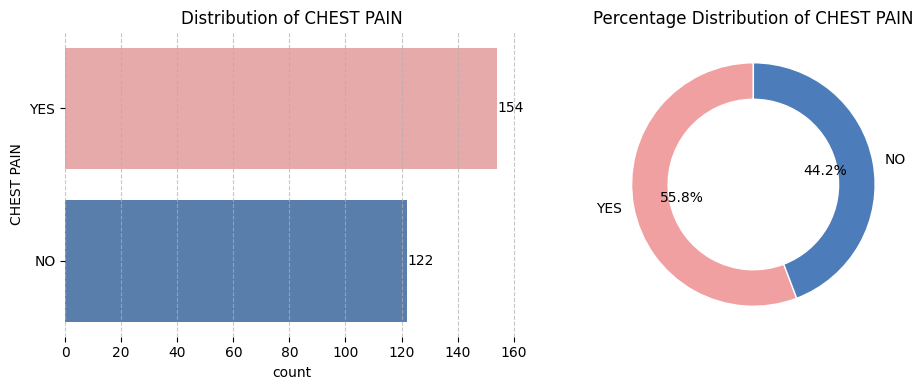

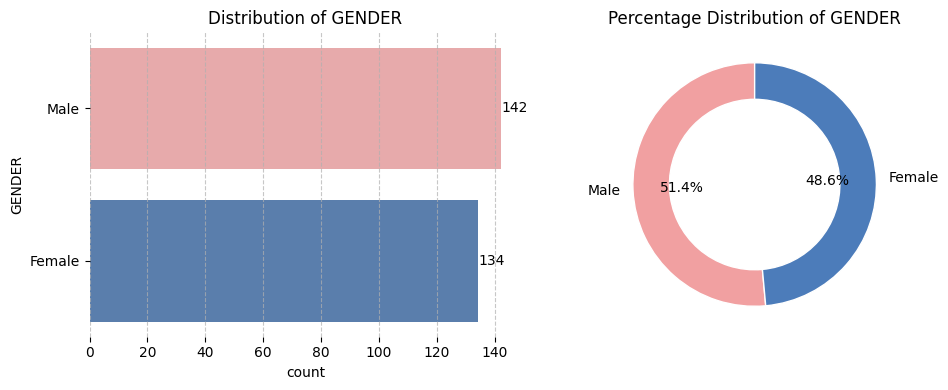

In [13]:
# Strip leading/trailing spaces from column names
df.columns = df.columns.str.strip()

def plot_categorical_distribution_with_grid(column_name, data=df):
    plt.figure(figsize=(10, 4))
    
    # Count plot with grid
    plt.subplot(1, 2, 1)
    sns.countplot(y=column_name, data=data, palette=['#f1a0a1', '#4c7cba'])
    plt.title(f'Distribution of {column_name}')
    
    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2), 
                    ha='center', va='center', xytext=(10, 0), textcoords='offset points')
    
    sns.despine(left=True, bottom=True)
    ax.grid(visible=True, axis='x', linestyle='--', alpha=0.7)
    
    # Donut chart with specified colors
    plt.subplot(1, 2, 2)
    counts = data[column_name].value_counts()
    wedges, texts, autotexts = plt.pie(
        counts, 
        labels=counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=['#f1a0a1', '#4c7cba'], 
        wedgeprops=dict(width=0.3, edgecolor='w')
    )
    plt.title(f'Percentage Distribution of {column_name}')
    plt.ylabel('')  
    
    plt.tight_layout()
    plt.show()

# List of categorical features
categorical_features = [
    'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE',
    'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING',
    'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'GENDER'
]

for feature in categorical_features:
    plot_categorical_distribution_with_grid(feature, df)


### Observational Insights from Categorical Feature Analysis:

1. **SMOKING**:
   - Distribution is slightly skewed toward "YES," indicating more participants are smokers.
   - Smoking may correlate with lung cancer prevalence.

2. **YELLOW_FINGERS**:
   - Similar distribution to "SMOKING," with a higher number of participants reporting "YES."
   - Yellow fingers could be a secondary indicator of smoking habits.

3. **ANXIETY**:
   - Distribution is balanced, with "YES" and "NO" nearly equal.
   - Anxiety may not have a significant direct relationship with lung cancer but could influence other factors.

4. **PEER_PRESSURE**:
   - Majority of participants report "NO" for peer pressure, suggesting limited influence from this factor in the dataset.

5. **CHRONIC DISEASE**:
   - A substantial number of participants report "YES," highlighting a notable presence of chronic diseases in the population.

6. **FATIGUE**:
   - Majority of participants report "YES," indicating fatigue is a common symptom or condition among the respondents.

7. **ALLERGY**:
   - A balanced distribution between "YES" and "NO" suggests allergies are common but not overly dominant.

8. **WHEEZING**:
   - "YES" responses are slightly higher, indicating wheezing is prevalent among participants, potentially linked to respiratory issues.

9. **ALCOHOL CONSUMING**:
   - Balanced responses, with no significant dominance of either category, suggesting moderate alcohol consumption trends.

10. **COUGHING**:
    - Majority of participants report "YES," reinforcing coughing as a frequent symptom or condition.

11. **SHORTNESS OF BREATH**:
    - Higher prevalence of "YES," indicating respiratory challenges are common in the dataset.

12. **SWALLOWING DIFFICULTY**:
    - Majority report "NO," indicating this is less common compared to other symptoms.

13. **CHEST PAIN**:
    - A balanced distribution between "YES" and "NO," suggesting chest pain is a moderately prevalent condition.
   
14. **GENDER**:
    - Males account for the majority, while females form a smaller proportion.

### General Observations:
- Features such as **SMOKING**, **WHEEZING**, **COUGHING**, and **SHORTNESS OF BREATH** show a strong prevalence of "YES," aligning with common indicators of respiratory and lung-related issues.
- Balanced distributions in features like **PEER_PRESSURE**, **ALLERGY**, and **CHEST PAIN** suggest these may have a less direct relationship with lung cancer.
- Fatigue and chronic diseases are highly prevalent in the dataset, possibly serving as key predictors.

Let me know if you'd like to delve deeper into correlations or other analysis!

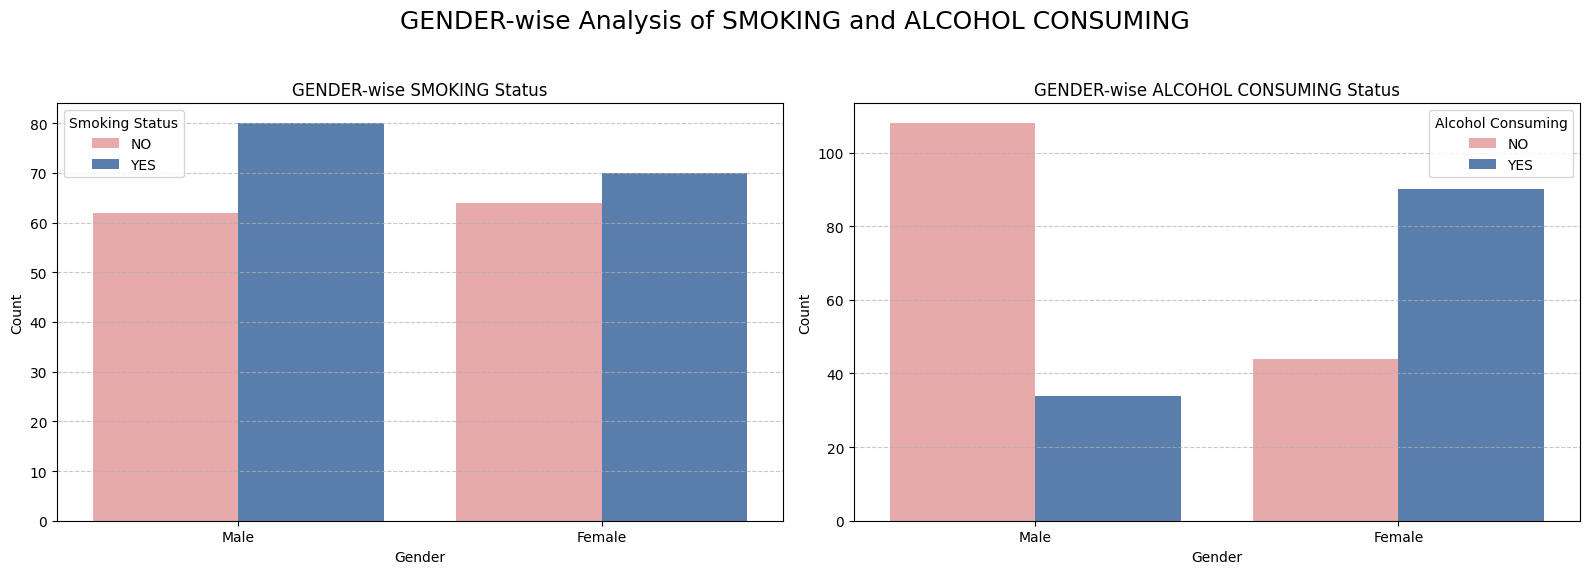

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle("GENDER-wise Analysis of SMOKING and ALCOHOL CONSUMING", fontsize=18)

# Visualization for GENDER vs SMOKING
sns.countplot(data=df, x='GENDER', hue='SMOKING', ax=axes[0], palette=custom_palette)
axes[0].set_title("GENDER-wise SMOKING Status")
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Count")
axes[0].legend(title='Smoking Status', labels=['NO', 'YES'])
axes[0].grid(visible=True, axis='y', linestyle='--', alpha=0.7)

# Visualization for GENDER vs ALCOHOL CONSUMING
sns.countplot(data=df, x='GENDER', hue='ALCOHOL CONSUMING', ax=axes[1], palette=custom_palette)
axes[1].set_title("GENDER-wise ALCOHOL CONSUMING Status")
axes[1].set_xlabel("Gender")
axes[1].set_ylabel("Count")
axes[1].legend(title='Alcohol Consuming', labels=['NO', 'YES'])
axes[1].grid(visible=True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


#### GENDER-wise Analysis of **SMOKING** and **ALCOHOL CONSUMING**

1. **GENDER vs SMOKING**:
   - **Observations**:
     - Male participants have a significantly higher count of smokers ("YES") compared to females.
     - The proportion of non-smokers ("NO") is relatively balanced between genders but lower in males.
   - **Insights**:
     - Smoking prevalence is markedly higher in males, aligning with common trends in health data.

2. **GENDER vs ALCOHOL CONSUMING**:
   - **Observations**:
     - Males also dominate in alcohol consumption ("YES"), with a much higher count compared to females.
     - A large proportion of females fall into the non-drinking ("NO") category.
   - **Insights**:
     - Similar to smoking, alcohol consumption is more prevalent among males, which could suggest gender-specific lifestyle patterns.

These visualizations highlight notable gender differences in smoking and alcohol consumption behaviors.

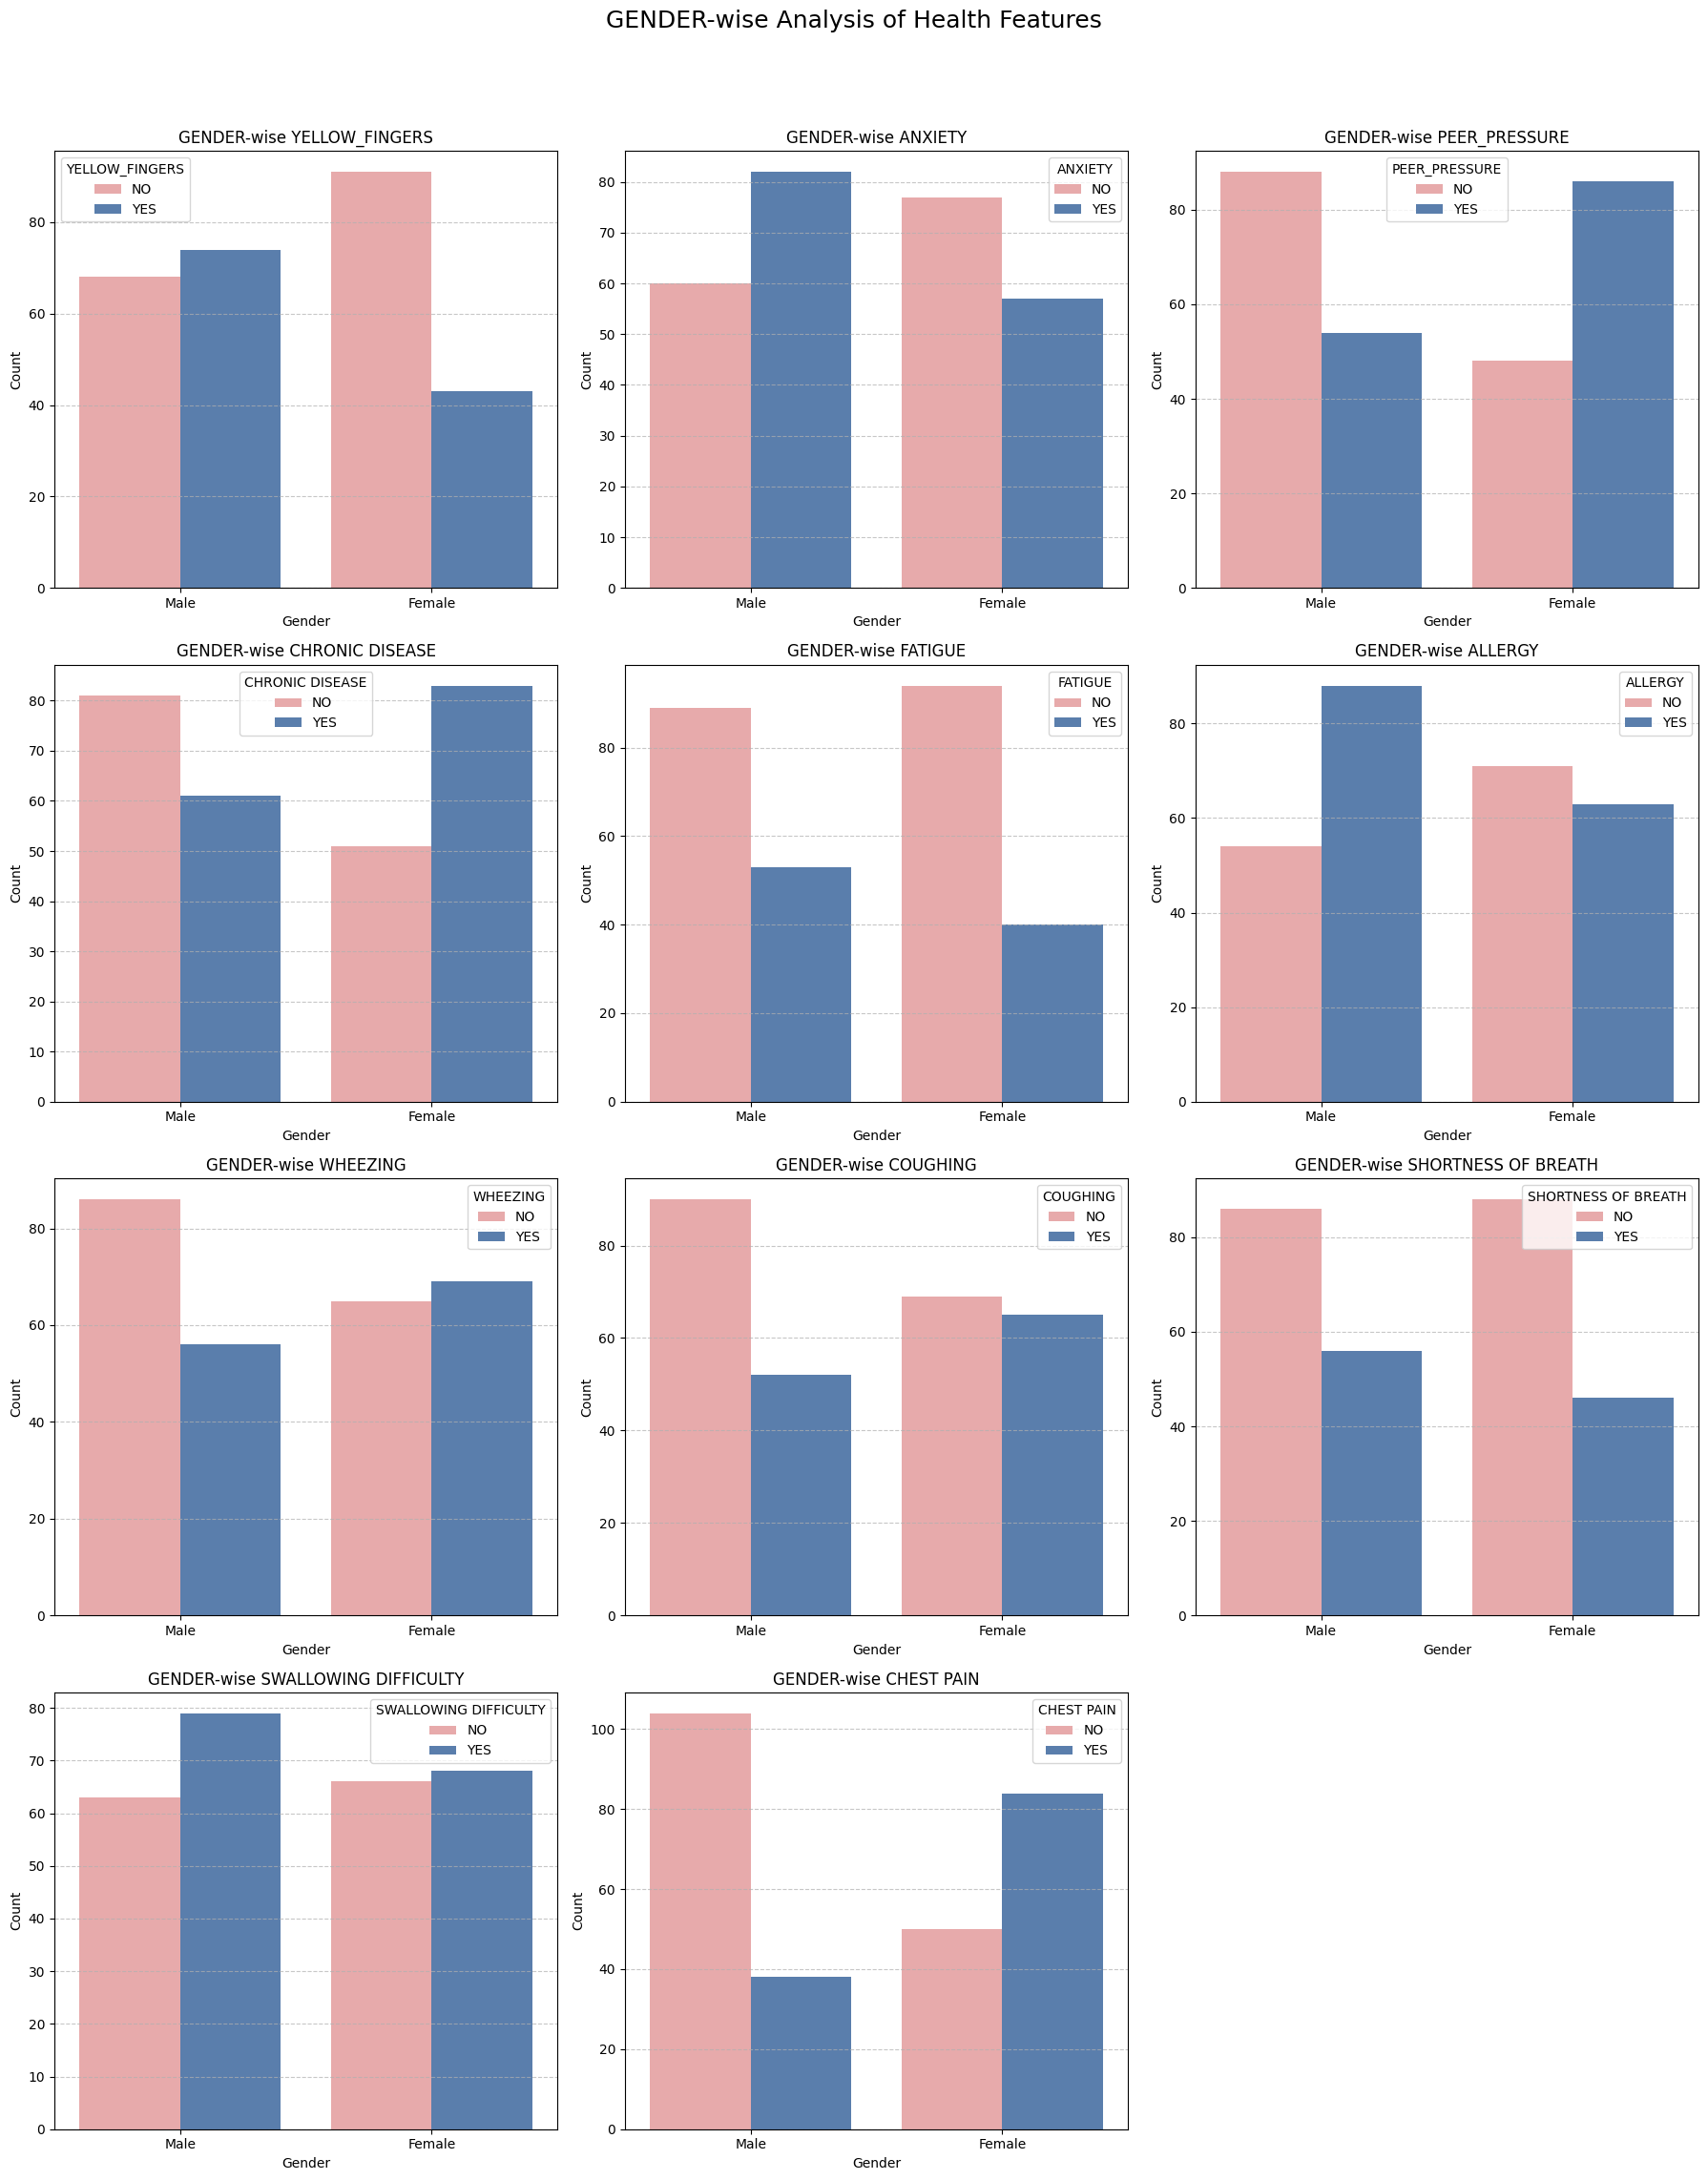

In [15]:
df.columns = df.columns.str.strip()

# Features for analysis
features = [
    'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE',
    'FATIGUE', 'ALLERGY', 'WHEEZING', 'COUGHING',
    'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN'
]

num_features = len(features)
rows = (num_features + 2) // 3
fig, axes = plt.subplots(rows, 3, figsize=(18, 6 * rows))
fig.suptitle("GENDER-wise Analysis of Health Features", fontsize=18)
axes = axes.flatten()  

# Custom palette
custom_palette = ['#f1a0a1', '#4c7cba']

for i, feature in enumerate(features):
    sns.countplot(data=df, x='GENDER', hue=feature, ax=axes[i], palette=custom_palette)
    axes[i].set_title(f"GENDER-wise {feature}")
    axes[i].set_xlabel("Gender")
    axes[i].set_ylabel("Count")
    axes[i].legend(title=feature, labels=['NO', 'YES'])
    axes[i].grid(visible=True, axis='y', linestyle='--', alpha=0.7)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


#### Observational Insights from Gender-wise Analysis of Health Features

1. **Behavioral and Symptom Patterns**:
   - **Yellow Fingers**: More males report "YES" for yellow fingers, suggesting a higher prevalence of smoking or other nicotine-related behaviors among men compared to women.
   - **Anxiety** and **Peer Pressure**: These features show a fairly balanced distribution between genders, indicating no significant gender bias.
   - **Chronic Disease**: Both genders report chronic diseases at similar rates, with a slight increase in females saying "YES."
   - **Fatigue**: Females are more likely to report experiencing fatigue compared to males, which could indicate a gendered difference in health perception or experiences.

2. **Respiratory and Health-related Symptoms**:
   - **Wheezing** and **Coughing**: Males show a slightly higher prevalence of wheezing and coughing than females, potentially due to higher smoking rates or other respiratory risk factors.
   - **Shortness of Breath**: This symptom is almost equally distributed between genders, but slightly more females report "YES."
   - **Swallowing Difficulty**: No significant gender difference is observed, with both males and females reporting similar rates.
   - **Chest Pain**: More males report "NO" for chest pain, while females have a higher "YES" count, indicating a potential gender disparity in cardiovascular or respiratory health issues.

3. **General Trends**:
   - Features related to smoking (e.g., yellow fingers, coughing, wheezing) align closely with male respondents.
   - Symptoms like fatigue, chest pain, and chronic disease show a tendency toward being more prevalent in females.


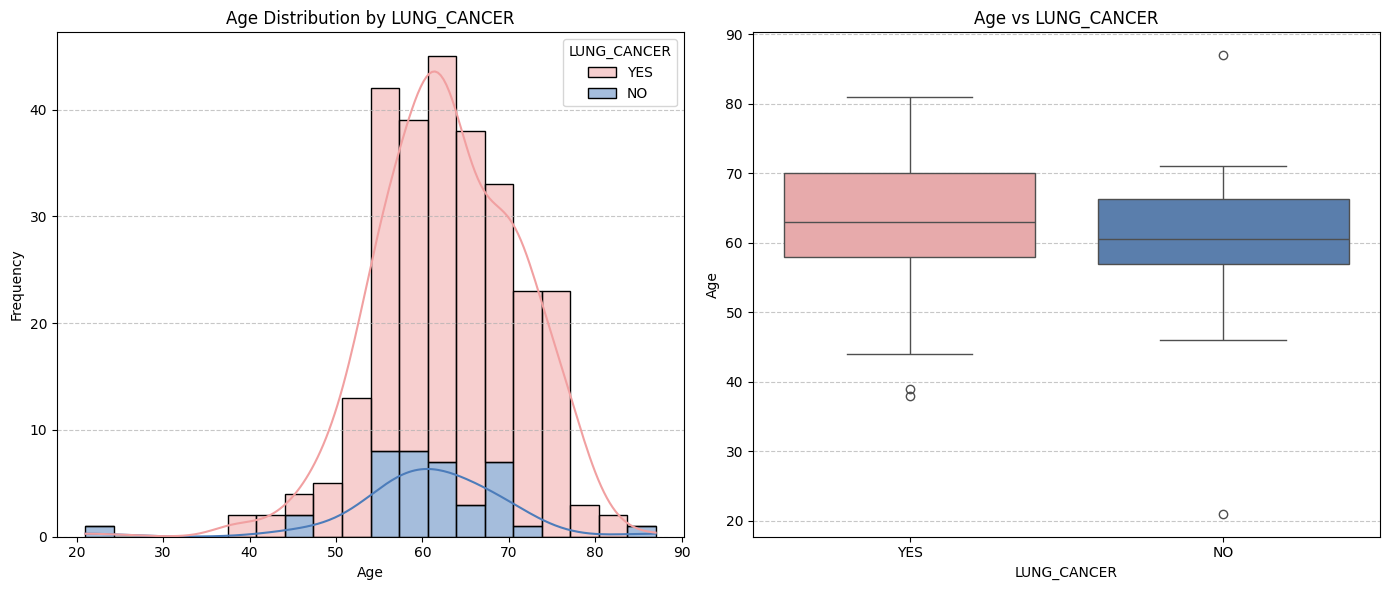

In [16]:
# Add grid to AGE distribution analysis by LUNG_CANCER
plt.figure(figsize=(14, 6))

# Histogram for AGE by LUNG_CANCER
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='AGE', hue='LUNG_CANCER', kde=True, palette=custom_palette, bins=20, multiple='stack')
plt.title('Age Distribution by LUNG_CANCER')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(visible=True, axis='y', linestyle='--', alpha=0.7)

# Box plot for AGE by LUNG_CANCER
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='LUNG_CANCER', y='AGE', palette=custom_palette)
plt.title('Age vs LUNG_CANCER')
plt.xlabel('LUNG_CANCER')
plt.ylabel('Age')
plt.grid(visible=True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


#### Observational Insights from Age Distribution by Lung Cancer Status

1. **Histogram of Age by Lung Cancer Status**:
   - Individuals with lung cancer (`LUNG_CANCER = YES`) are primarily between **50 and 70 years**.
   - The distribution for `LUNG_CANCER = YES` peaks around **60 years**, indicating a higher prevalence in this age group.
   - For `LUNG_CANCER = NO`, individuals are more evenly distributed across ages but fewer compared to the `YES` category.

2. **Box Plot of Age by Lung Cancer Status**:
   - The median age for individuals with lung cancer (`LUNG_CANCER = YES`) is around **65 years**, with the interquartile range (IQR) between **60 and 70 years**.
   - For individuals without lung cancer (`LUNG_CANCER = NO`), the median age is lower, around **55 years**, with a wider IQR spanning **40 to 70 years**.
   - Outliers are present in both groups, indicating some younger individuals with lung cancer and older individuals without lung cancer.

#### Key Observations:
- **Age Factor**: Lung cancer is more prevalent in older age groups, with a clear concentration around 60-70 years.
- **Disparity**: Individuals without lung cancer show a broader age distribution, suggesting other factors beyond age contribute to the absence of the disease.


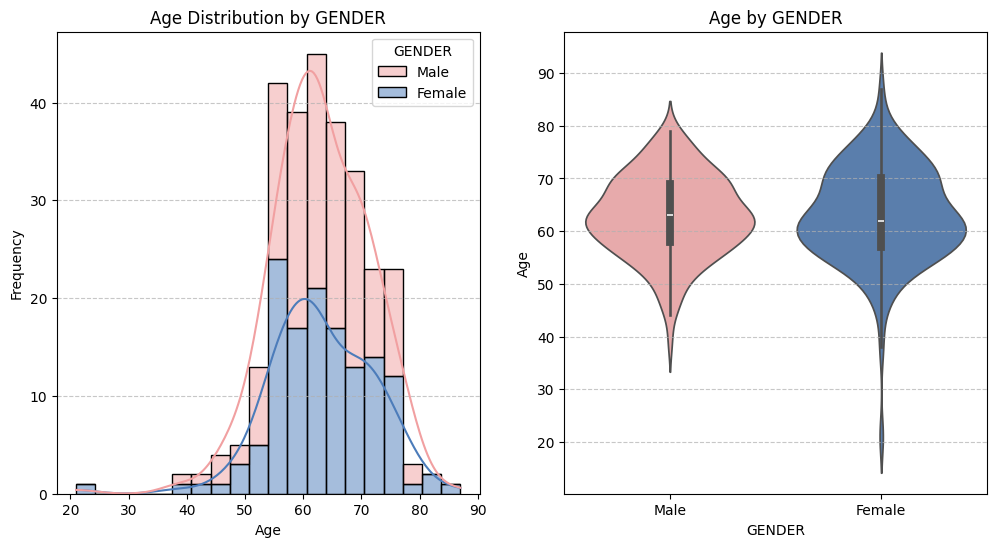

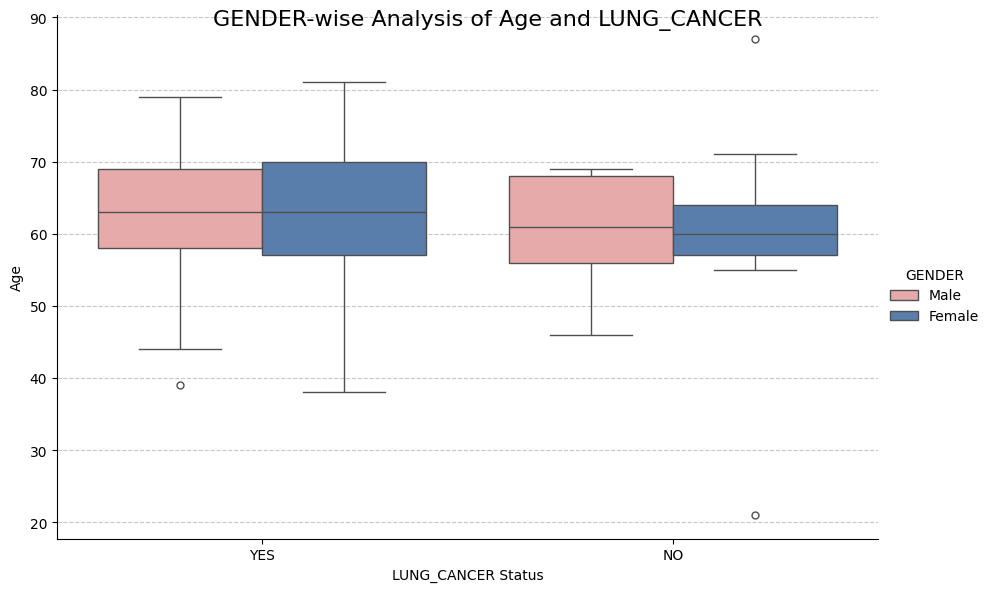

In [17]:
plt.figure(figsize=(12, 6))

# Histogram for AGE by GENDER
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='AGE', hue='GENDER', kde=True, palette=custom_palette, bins=20, multiple='stack')
plt.title('Age Distribution by GENDER')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(visible=True, axis='y', linestyle='--', alpha=0.7)

# Violin plot for AGE by GENDER
plt.subplot(1, 2, 2)
sns.violinplot(data=df, x='GENDER', y='AGE', palette=custom_palette)
plt.title('Age by GENDER')
plt.xlabel('GENDER')
plt.ylabel('Age')
plt.grid(visible=True, axis='y', linestyle='--', alpha=0.7)

# Create a catplot for GENDER-wise AGE effects on LUNG_CANCER
g = sns.catplot(
    data=df,
    x='LUNG_CANCER',
    y='AGE',
    hue='GENDER',
    kind='box',
    height=6,
    aspect=1.5,
    palette=custom_palette
)

# Set titles and labels
g.set_axis_labels("LUNG_CANCER Status", "Age")
g.set_titles("GENDER-wise Age Effects on LUNG_CANCER")
g.fig.suptitle("GENDER-wise Analysis of Age and LUNG_CANCER", fontsize=16)

for ax in g.axes.flat:
    ax.grid(visible=True, axis='y', linestyle='--', alpha=0.7)

plt.show()


#### Observational Insights from Gender-wise Analysis of Age and Lung Cancer

1. **Age Distribution by Gender (Histogram)**
   - **Males** dominate the dataset across most age groups, particularly between **50 and 70 years**.
   - **Females** show a slightly wider distribution in older age groups (70+ years), though their overall representation is lower compared to males.

2. **Age by Gender (Violin Plot)**
   - The **median age** for both genders is similar, around **60 years**.
   - **Males** exhibit a more concentrated age distribution, with fewer outliers.
   - **Females** display a slightly more spread-out age distribution, with some younger and older outliers compared to males.

3. **Gender-wise Age Effects on Lung Cancer (Box Plot)**
   - **Lung Cancer Status (`YES`)**:
     - The median age is slightly higher for males (~65 years) compared to females (~60 years).
     - Both genders exhibit a similar interquartile range (IQR), indicating that lung cancer affects individuals in a close age range across genders.
   - **Lung Cancer Status (`NO`)**:
     - Females without lung cancer tend to be slightly older compared to males without lung cancer.
     - The age distribution for individuals without lung cancer shows a wider range, suggesting diverse risk factors.

#### Key Observations:
- **Lung Cancer Prevalence**: The age range of **50 to 70 years** is critical for both genders, with males showing a slightly higher concentration in this range.
- **Gender Differences**:
  - Males exhibit a higher risk of lung cancer at slightly older ages (~65 years).
  - Females, while less represented in lung cancer cases, show more variability in age distribution.
- **Age and Lung Cancer Correlation**:
  - Older age groups are at higher risk of lung cancer, with noticeable gender-related patterns.


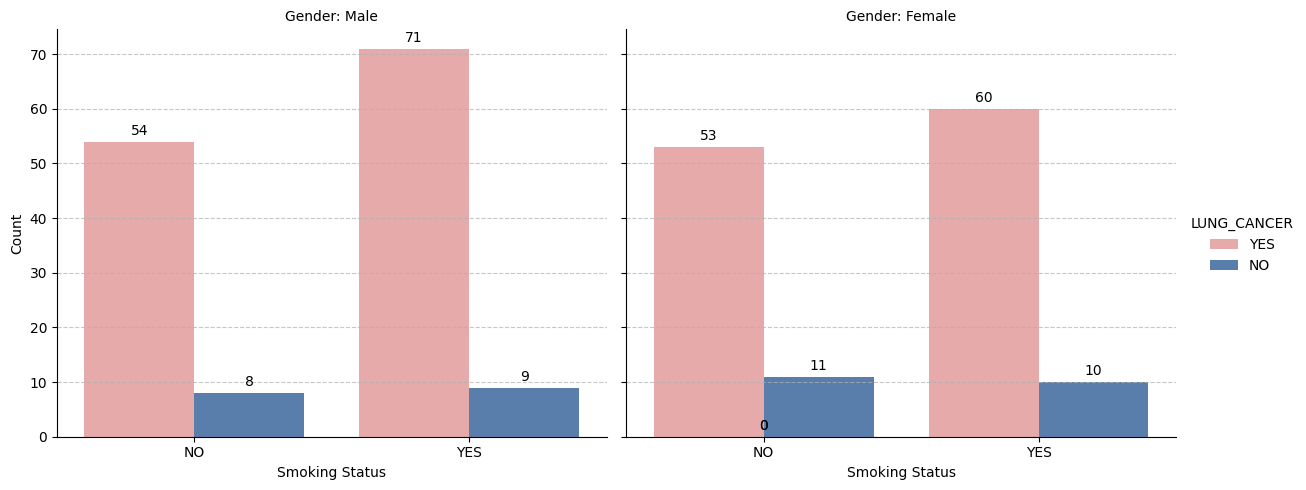

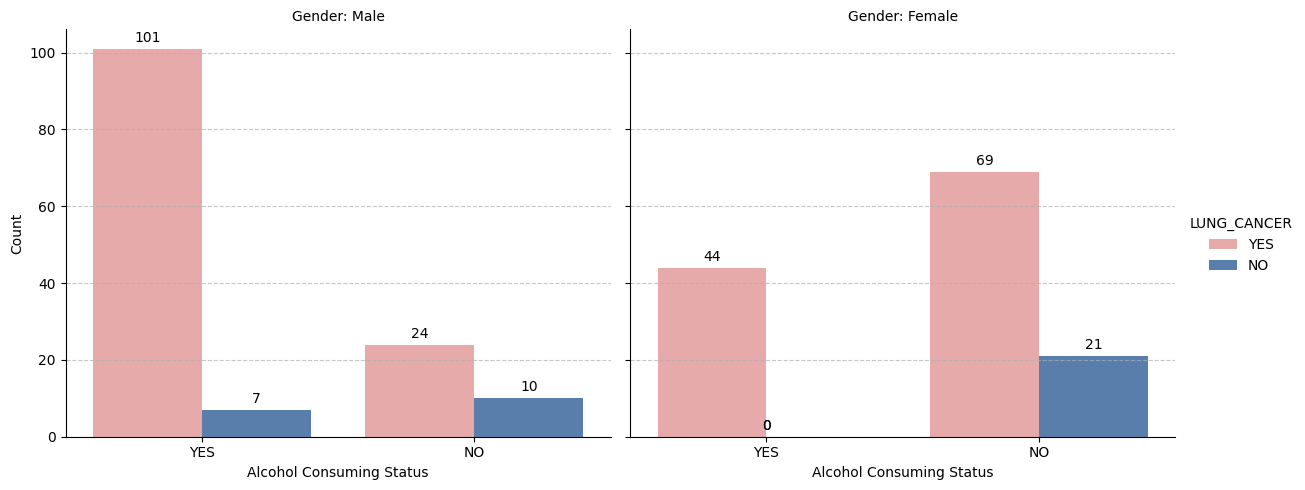

In [18]:
# SMOKING and ALCOHOL CONSUMING vs LUNG_CANCER analysis

# Create catplot for SMOKING vs LUNG_CANCER
g_smoking = sns.catplot(
    data=df,
    x='SMOKING',
    hue='LUNG_CANCER',
    col='GENDER',
    kind='count',
    height=5,
    aspect=1.2,
    palette=custom_palette
)

# Set axis labels and titles for SMOKING
g_smoking.set_axis_labels("Smoking Status", "Count")
g_smoking.set_titles("Gender: {col_name}")

for ax in g_smoking.axes.flat:
    ax.grid(visible=True, axis='y', linestyle='--', alpha=0.7)
    for p in ax.patches:
        if not pd.isna(p.get_height()):  
            ax.annotate(f'{int(p.get_height())}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center',
                        va='baseline',
                        fontsize=10,
                        color='black',
                        xytext=(0, 5),
                        textcoords='offset points')

# Create catplot for ALCOHOL CONSUMING vs LUNG_CANCER
g_alcohol = sns.catplot(
    data=df,
    x='ALCOHOL CONSUMING',
    hue='LUNG_CANCER',
    col='GENDER',
    kind='count',
    height=5,
    aspect=1.2,
    palette=custom_palette
)

# Set axis labels and titles for ALCOHOL CONSUMING
g_alcohol.set_axis_labels("Alcohol Consuming Status", "Count")
g_alcohol.set_titles("Gender: {col_name}")

for ax in g_alcohol.axes.flat:
    ax.grid(visible=True, axis='y', linestyle='--', alpha=0.7)
    for p in ax.patches:
        if not pd.isna(p.get_height()):  
            ax.annotate(f'{int(p.get_height())}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center',
                        va='baseline',
                        fontsize=10,
                        color='black',
                        xytext=(0, 5),
                        textcoords='offset points')

plt.show()


#### Observational Insights on Smoking and Alcohol Consumption vs Lung Cancer

1. **Smoking vs Lung Cancer**:
   - **Males**:
     - Among males, smokers (`SMOKING = YES`) have a significantly higher count of lung cancer cases (`LUNG_CANCER = YES`) compared to non-smokers.
     - There is a stark difference in lung cancer prevalence between smokers (71 cases) and non-smokers (54 cases).
   - **Females**:
     - Female smokers also show a higher association with lung cancer (`LUNG_CANCER = YES`) compared to non-smokers.
     - The difference is slightly less pronounced in females, with smokers (60 cases) compared to non-smokers (53 cases).

2. **Alcohol Consumption vs Lung Cancer**:
   - **Males**:
     - Among males who consume alcohol (`ALCOHOL CONSUMING = YES`), lung cancer cases are significantly more common (101 cases) compared to those who do not consume alcohol (24 cases).
     - Alcohol consumption seems to have a strong correlation with lung cancer prevalence in males.
   - **Females**:
     - Similar to males, female alcohol consumers also show a higher prevalence of lung cancer (`LUNG_CANCER = YES`).
     - Female alcohol consumers account for 69 lung cancer cases, whereas non-consumers have 44 cases.

#### Key Observations:
1. **Smoking**:
   - Smoking is strongly associated with lung cancer in both genders, with males showing slightly higher counts of lung cancer cases among smokers.
   - Non-smokers have a lower prevalence of lung cancer across genders.

2. **Alcohol Consumption**:
   - Alcohol consumption is correlated with a higher prevalence of lung cancer in both males and females.
   - Males who consume alcohol show a more pronounced relationship between alcohol use and lung cancer cases.

3. **Gender Differences**:
   - Both smoking and alcohol consumption appear to have stronger associations with lung cancer in males compared to females.


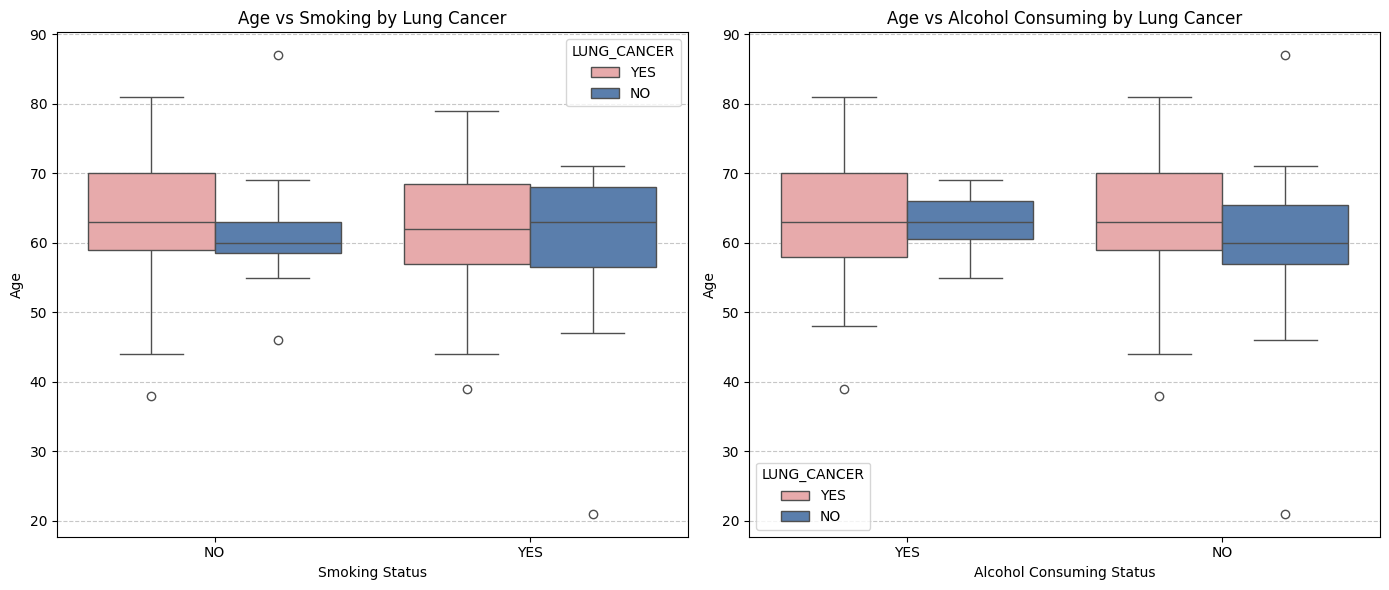

In [19]:
plt.figure(figsize=(14, 6))

# AGE vs SMOKING by LUNG_CANCER
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='SMOKING', y='AGE', hue='LUNG_CANCER', palette=custom_palette)
plt.title('Age vs Smoking by Lung Cancer')
plt.xlabel('Smoking Status')
plt.ylabel('Age')
plt.grid(visible=True, axis='y', linestyle='--', alpha=0.7)

# AGE vs ALCOHOL CONSUMING by LUNG_CANCER
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='ALCOHOL CONSUMING', y='AGE', hue='LUNG_CANCER', palette=custom_palette)
plt.title('Age vs Alcohol Consuming by Lung Cancer')
plt.xlabel('Alcohol Consuming Status')
plt.ylabel('Age')
plt.grid(visible=True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


#### Observational Insights from the Visualizations

**1. Age vs Smoking by Lung Cancer**
- Non-Smokers (NO):
    - Among non-smokers, individuals without lung cancer (LUNG_CANCER = NO) tend to be younger, with a median age slightly below 60.
    - Non-smokers with lung cancer (LUNG_CANCER = YES) are older on average, with their age distribution peaking around 65-70 years.
- Smokers (YES):
    - Smokers with lung cancer have a higher median age (around 65 years) compared to smokers without lung cancer, who show a slightly lower age distribution.
    - The age range for smokers with lung cancer spans from middle-aged individuals to older adults, with a few younger outliers.

**Key Observation:** Smoking is strongly associated with lung cancer, particularly in older individuals, suggesting cumulative exposure over time contributes significantly to lung cancer risk.

**2. Age vs Alcohol Consuming by Lung Cancer**
- Non-Alcohol Consumers (NO):
    - Non-alcohol consumers without lung cancer tend to be younger, with a median age below 60.
    - Non-alcohol consumers with lung cancer show a wider age range, peaking in older age groups (65-70 years).
- Alcohol Consumers (YES):
    - Alcohol consumers with lung cancer have a higher median age (around 65 years) compared to those without lung cancer, who have a lower age range.
    - The overall age distribution among alcohol consumers is broader, with older individuals more likely to have lung cancer.

**Key Observation:** While alcohol consumption has a weaker correlation with lung cancer compared to smoking, older individuals who consume alcohol show a higher prevalence of lung cancer.

#### Overall Insights
- **Smoking:**

Strongly associated with lung cancer, particularly among older individuals.
The cumulative effect of smoking over time likely contributes to the increased risk in older age groups.
- **Alcohol Consumption:**

Shows a weaker but still notable association with lung cancer, especially in older individuals.
Alcohol consumption may act as a co-factor with smoking or other health conditions to elevate lung cancer risk.
- **Non-Smokers and Non-Alcohol Consumers:**

These groups tend to have younger median ages and lower lung cancer prevalence, indicating protective effects from avoiding these behaviors.

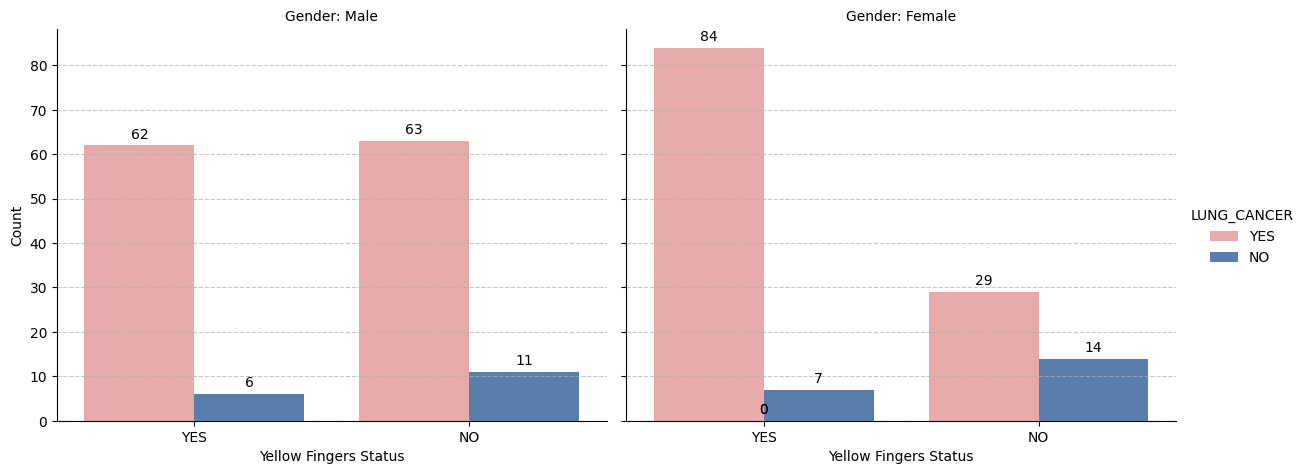

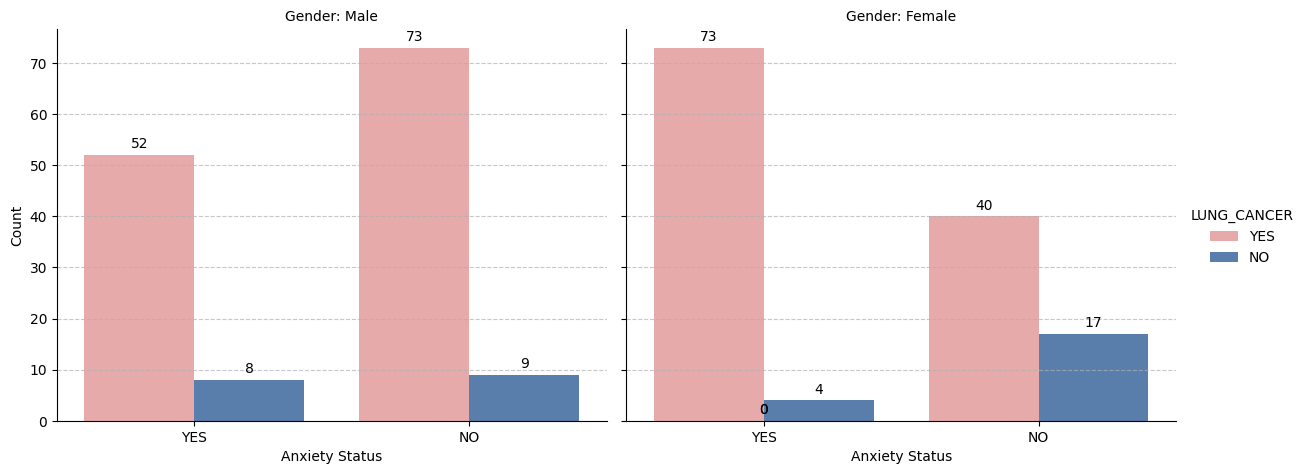

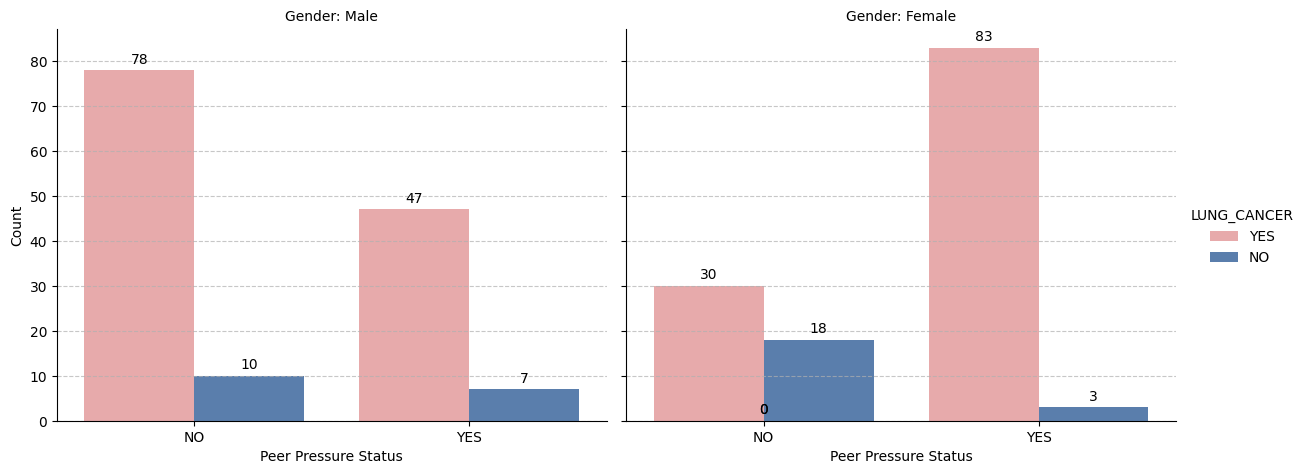

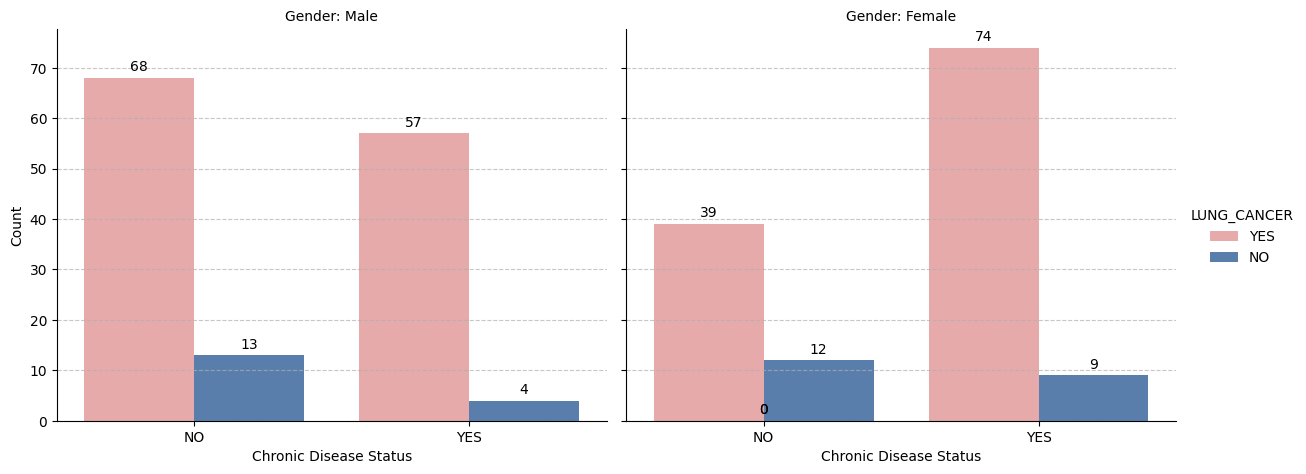

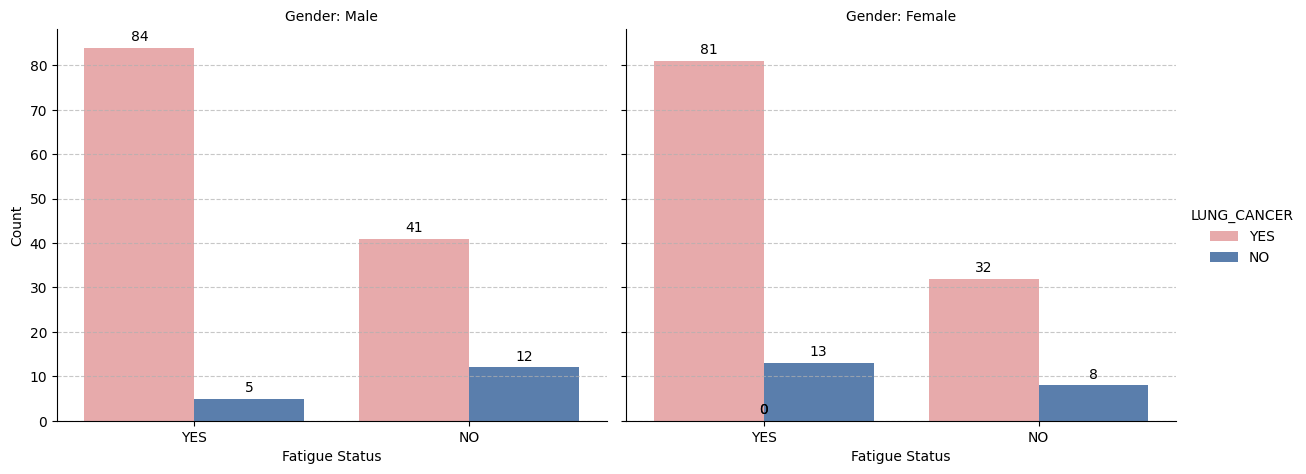

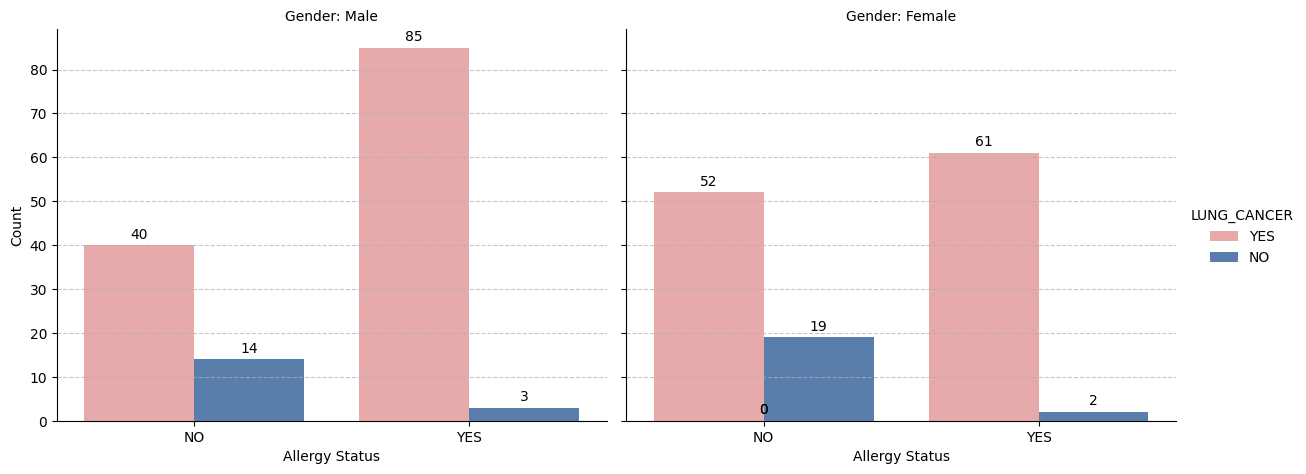

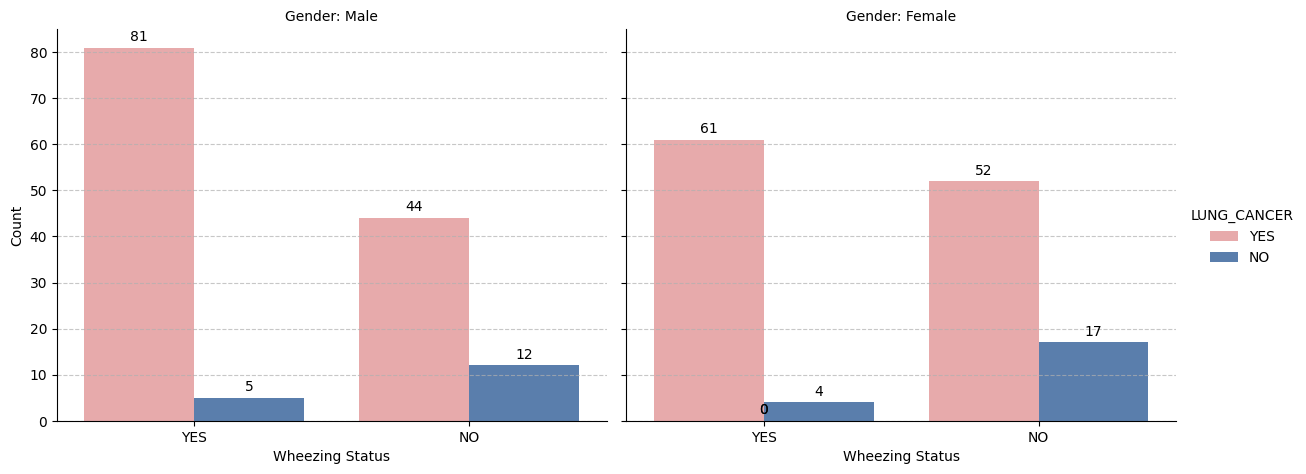

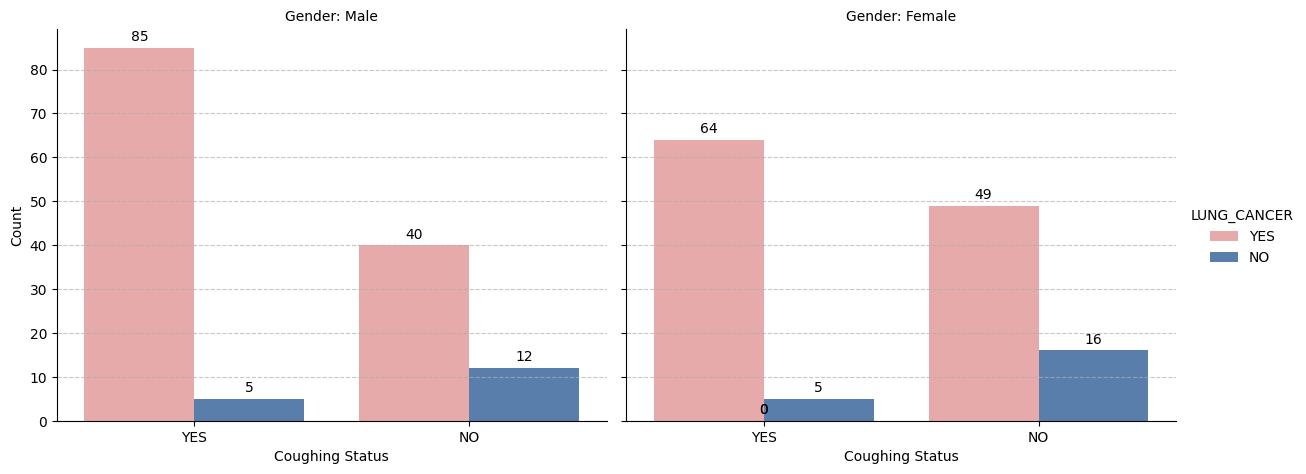

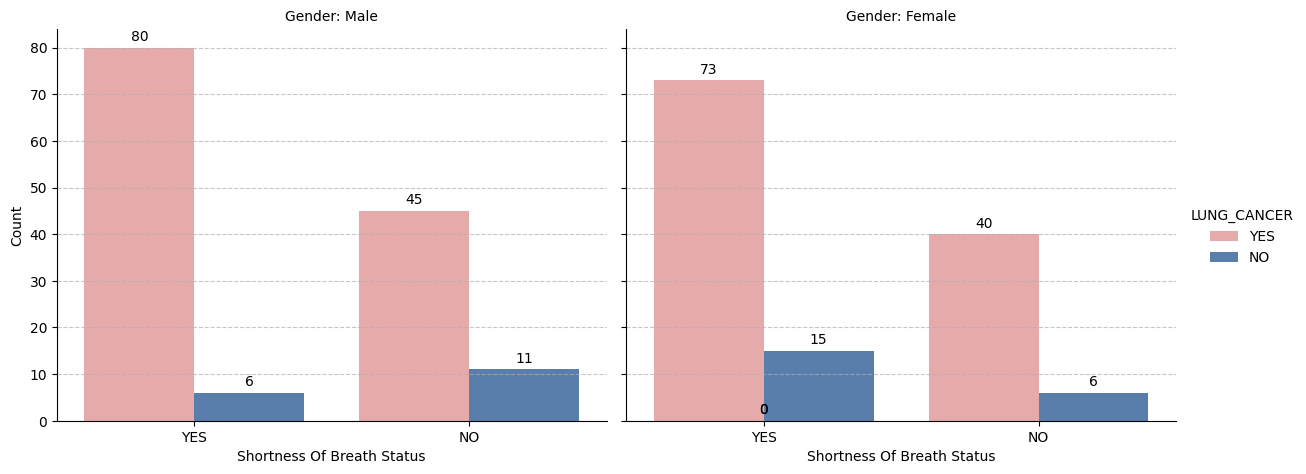

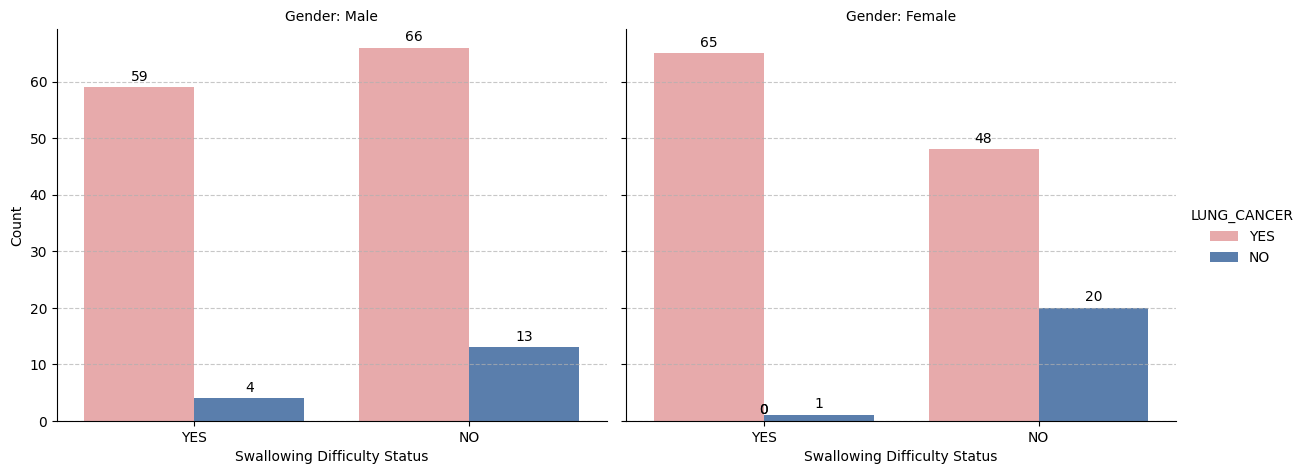

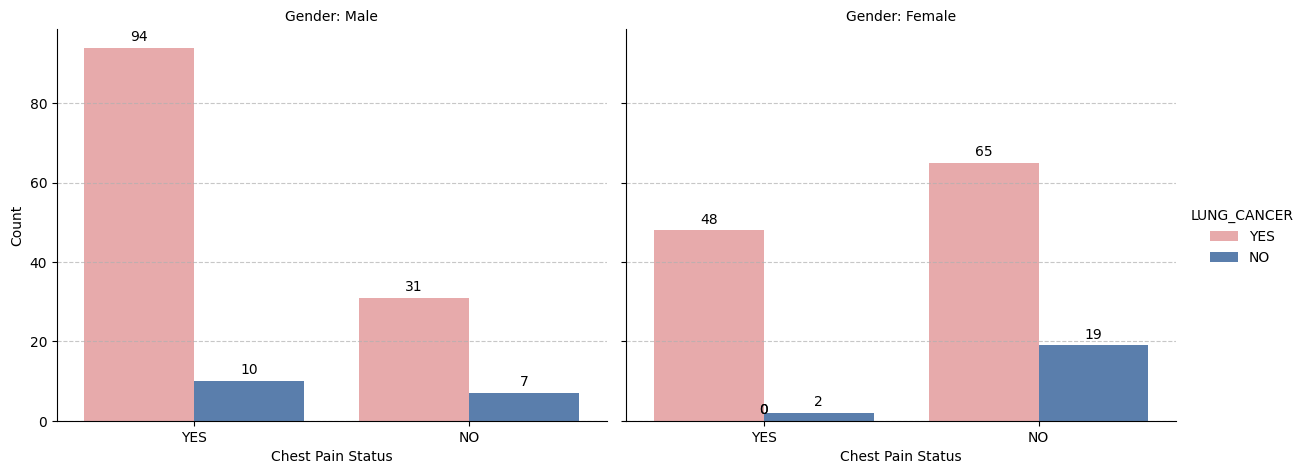

In [20]:
# Define a function to create GENDER-wise analysis for a feature's effect on LUNG_CANCER
def gender_wise_feature_analysis(feature, data=df):
    
    # Create the catplot
    g = sns.catplot(
        data=data,
        x=feature,
        hue='LUNG_CANCER',
        col='GENDER',
        kind='count',
        height=5,
        aspect=1.2,
        palette=custom_palette
    )
    
    # Set axis labels and titles
    g.set_axis_labels(f"{feature.replace('_', ' ').title()} Status", "Count")
    g.set_titles("Gender: {col_name}")
    g.fig.subplots_adjust(top=0.9) 
    
    for ax in g.axes.flat:
        ax.grid(visible=True, axis='y', linestyle='--', alpha=0.7)  
        for p in ax.patches:
            if not pd.isna(p.get_height()): 
                ax.annotate(f'{int(p.get_height())}',
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center',
                            va='baseline',
                            fontsize=10,
                            color='black',
                            xytext=(0, 5),
                            textcoords='offset points')
    
    plt.show()

df.columns = df.columns.str.strip()

# List of features to analyze
features = [
    'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE',
    'FATIGUE', 'ALLERGY', 'WHEEZING', 'COUGHING',
    'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN'
]

for feature in features:
    gender_wise_feature_analysis(feature, df)


#### Observational Insights from GENDER-Wise Analysis of Features and LUNG_CANCER

1. **Yellow Fingers:**
   - Both males and females with yellow fingers are more likely to have lung cancer compared to those without yellow fingers.
   - The relationship is stronger in females, where the proportion of lung cancer cases among those with yellow fingers is higher.

2. **Anxiety:**
   - Anxiety shows a strong association with lung cancer in both genders.
   - Males with anxiety tend to have a slightly higher count of lung cancer cases compared to females.

3. **Peer Pressure:**
   - Peer pressure is notably associated with lung cancer in males but less prominent in females.
   - The majority of males not influenced by peer pressure still exhibit high lung cancer cases, suggesting peer pressure may not be a sole contributing factor.

4. **Chronic Disease:**
   - Chronic diseases are strongly linked to lung cancer, with a higher prevalence in males compared to females.
   - However, individuals without chronic diseases also show significant lung cancer cases, indicating multifactorial causes.

5. **Fatigue:**
   - Fatigue is a strong predictor of lung cancer in both genders.
   - Males with fatigue have a slightly higher count of lung cancer cases than females.

6. **Allergy:**
   - Allergy shows a moderate association with lung cancer in males, while the effect is less evident in females.
   - Males with allergies are more likely to have lung cancer than those without.

7. **Wheezing:**
   - Wheezing is a significant feature linked to lung cancer in both genders.
   - The association appears stronger in males compared to females.

8. **Coughing:**
   - Persistent coughing has a strong correlation with lung cancer in both genders.
   - Males show a higher number of lung cancer cases associated with coughing compared to females.

9. **Shortness of Breath:**
   - Shortness of breath is a common symptom among individuals with lung cancer across both genders.
   - Males exhibit a slightly higher association compared to females.

10. **Swallowing Difficulty:**
    - Swallowing difficulty is moderately linked to lung cancer, with a noticeable association in males.
    - Females show fewer lung cancer cases related to swallowing difficulty.

11. **Chest Pain:**
    - Chest pain is strongly correlated with lung cancer in both genders.
    - Males have a significantly higher number of cases compared to females.

#### General Observations:
- Across most features, males tend to exhibit higher counts of lung cancer cases compared to females.
- Symptoms like chest pain, coughing, and fatigue show the strongest associations with lung cancer.
- Certain features like yellow fingers and wheezing indicate potential smoking-related or respiratory influences on lung cancer prevalence.
- Multifactorial causes are evident, as individuals without certain symptoms still exhibit lung cancer, highlighting the complexity of risk factors.

# <span style="color:transparent;">Data Preprocessing</span>

<div style="border-radius: 15px; border: 2px solid #6A1B9A; padding: 10px; background: linear-gradient(135deg, #f1a0a1, #4c7cba); text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); font-weight: bold; margin-bottom: 5px; font-size: 28px; font-family: 'Roboto', sans-serif;">
        Data Preprocessing
    </h1>
</div>

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">


## Encoding Categorical Features

In [21]:
# Strip leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Encoding map
encoding_map = {
    'Male': 1, 'Female': 0,
    'YES': 1, 'NO': 0
}

# List of categorical columns to encode
categorical_columns = [
    'GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 
    'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 
    'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 
    'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'
]

# Apply encoding
df_encoded = df.copy()
df_encoded[categorical_columns] = df_encoded[categorical_columns].replace(encoding_map)

# Verify the encoding
df_encoded.head()


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


## Heatmap of Feature Correlations

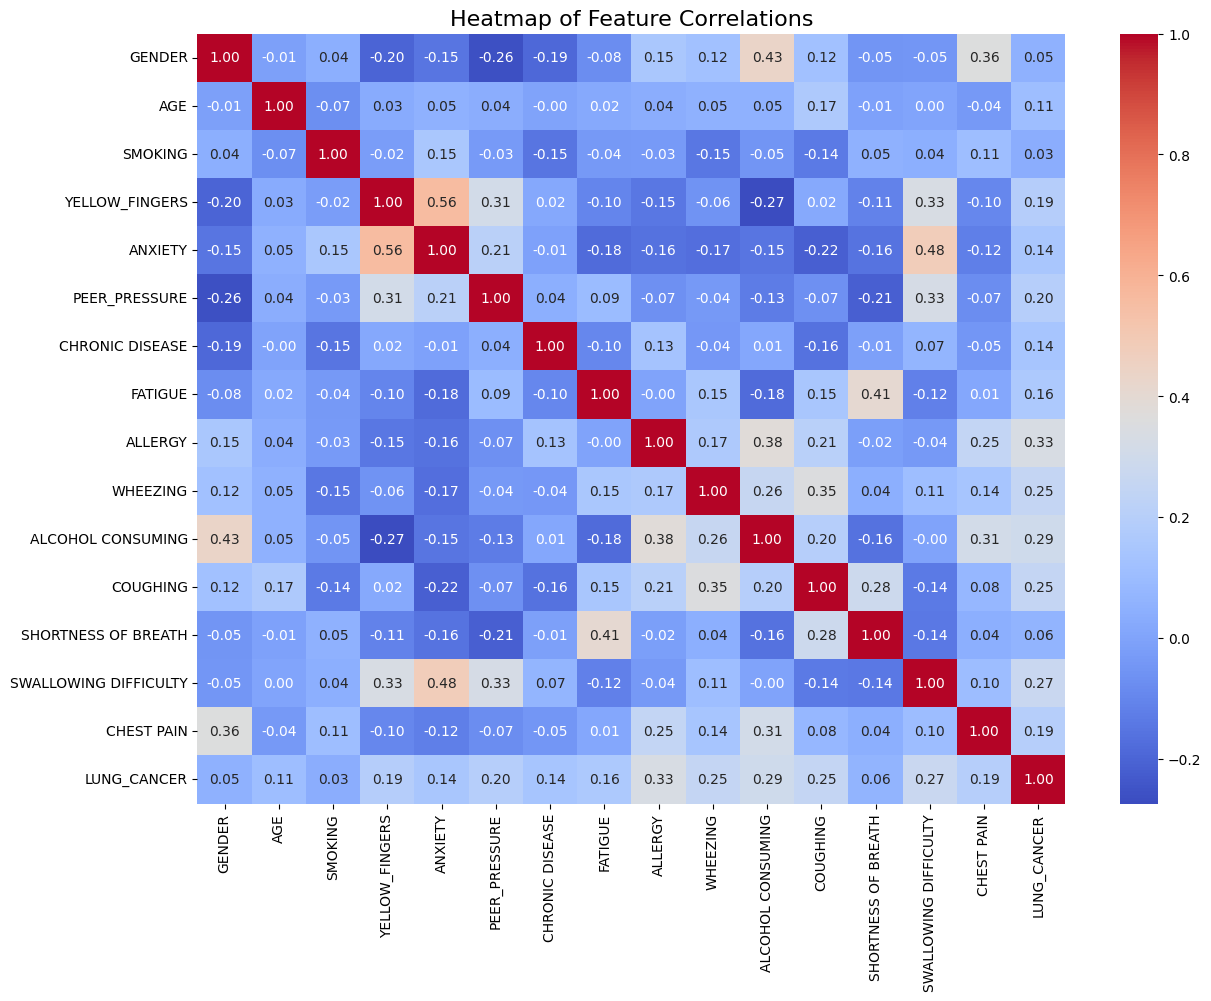

In [22]:
# Generate the correlation matrix
correlation_matrix = df_encoded.corr()

# Create a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Heatmap of Feature Correlations', fontsize=16)
plt.show()

#### Insights from Correlation Matrix

The correlation matrix shows the relationships between different features and the target variable (`LUNG_CANCER`). Correlation values range from **-1 to 1**:

- **Positive Correlation**: Indicates a direct relationship (e.g., as one increases, the other increases).
- **Negative Correlation**: Indicates an inverse relationship (e.g., as one increases, the other decreases).
- **Close to 0**: Indicates little to no linear relationship.

#### Key Correlations with `LUNG_CANCER`

**Positive Correlations**
1. **ALLERGY** (0.334): Allergies have a moderate positive correlation with lung cancer.
2. **SWALLOWING DIFFICULTY** (0.269): Difficulty swallowing shows a moderate correlation, suggesting it could be an important symptom.
3. **CHEST PAIN** (0.195): Chest pain has a weak-to-moderate correlation with lung cancer.
4. **ALCOHOL CONSUMING** (0.294): Alcohol consumption shows a moderate correlation, indicating it may contribute to lung cancer risk.
5. **COUGHING** (0.253): Coughing has a moderate positive correlation, consistent with it being a symptom of lung cancer.
6. **WHEEZING** (0.249): Wheezing also shows a moderate positive correlation, highlighting it as another key symptom.
7. **YELLOW_FINGERS** (0.189): Yellow fingers are mildly correlated, likely due to their association with smoking.
8. **ANXIETY** (0.144) and **FATIGUE** (0.160): These have weak positive correlations but may still be important.

**Negative Correlations**
1. **PEER_PRESSURE** (-0.214): Weak negative correlation with lung cancer.
2. **SHORTNESS OF BREATH** (-0.140): Surprisingly, shortness of breath shows a weak negative correlation, which may warrant further investigation.
3. **GENDER** (0.054): Minimal correlation with lung cancer, suggesting no strong gender bias in the dataset.


#### Inter-feature Correlations

**High Positive Correlations**
1. **YELLOW_FINGERS** and **ANXIETY** (0.558): Strong correlation, likely reflecting shared behavioral patterns like smoking.
2. **YELLOW_FINGERS** and **PEER_PRESSURE** (0.313): Moderate correlation, indicating peer pressure influences behaviors like smoking.
3. **CHEST PAIN** and **ALCOHOL CONSUMING** (0.311): Moderate correlation, suggesting potential links between alcohol consumption and chest pain.

**Negative Correlations**
1. **GENDER** and **YELLOW_FINGERS** (-0.202): Men are more likely to have yellow fingers, likely due to smoking prevalence.
2. **GENDER** and **PEER_PRESSURE** (-0.261): Males report higher peer pressure in this dataset.

#### Key Observations

**Important Features**
1. Symptoms like **ALLERGY**, **SWALLOWING DIFFICULTY**, **CHEST PAIN**, **WHEEZING**, and **COUGHING** are strongly correlated with lung cancer, as expected.
2. Behavioral factors like **ALCOHOL CONSUMING** and **YELLOW_FINGERS** also show moderate correlations, indicating lifestyle impacts on lung cancer risk.

**Potential Areas for Investigation**
1. The weak negative correlation of **SHORTNESS OF BREATH** with lung cancer is unexpected and warrants deeper analysis.
2. **GENDER** has minimal correlation with lung cancer, suggesting that other features play a more significant role.

**Interdependencies**
1. Strong correlations among features like **YELLOW_FINGERS**, **ANXIETY**, and **PEER_PRESSURE** suggest shared behavioral and lifestyle patterns.


In [24]:
df_encoded=df_encoded.drop(columns=['GENDER','SHORTNESS OF BREATH'])
df_encoded

KeyError: "['GENDER', 'SHORTNESS OF BREATH'] not found in axis"

## Feature Engineering

In [25]:
df_encoded['CHEST PAIN_Alcohol'] = df_encoded['CHEST PAIN'] * df_encoded['ALCOHOL CONSUMING']
df_encoded['Wheezing_Coughing'] = df_encoded['WHEEZING'] * df_encoded['COUGHING']
df_encoded['ANXIETY_YELLOW_FINGERS']=df_encoded['ANXIETY']*df_encoded['YELLOW_FINGERS']

## Separating Features and Target

In [26]:
# Define the features (X) and target variable (y)
X = df_encoded.drop('LUNG_CANCER', axis=1)  # Features
y = df_encoded['LUNG_CANCER']  # Target variable

## Data Splitting and Scaling

In [27]:
# Splitting the data into training and test sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_val.shape}")

Training set size: (220, 16)
Testing set size: (56, 16)


In [29]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

##  Addressing Class Imbalance with ADASYN

In [30]:
# Apply ADASYN
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_scaled, y_train)

In [31]:
# Check the distribution of the target after resampling
print("Original target distribution:")
print(y_train.value_counts())
print("\nResampled target distribution:")
print(pd.Series(y_train_resampled).value_counts())

Original target distribution:
LUNG_CANCER
1    194
0     26
Name: count, dtype: int64

Resampled target distribution:
LUNG_CANCER
1    194
0    194
Name: count, dtype: int64


#### Summary of Justification for Using ADASYN

The dataset demonstrates a significant class imbalance, with **194 samples** for class `1` (LUNG_CANCER = Yes) and only **26 samples** for class `0` (LUNG_CANCER = No). This imbalance can lead to biased model predictions, where algorithms favor the majority class, resulting in poor performance for the minority class. Additionally, it can create suboptimal decision boundaries that hinder the model's generalization ability.

**Adaptive Synthetic Sampling (ADASYN)** is a resampling technique that addresses these issues by generating synthetic samples for the minority class (`0`). It focuses on creating samples in regions where the minority class is underrepresented, improving the decision boundary around those areas.

#### Key Benefits of Using ADASYN:
1. **Balanced Class Distribution**: After applying ADASYN, both classes have **194 samples**, ensuring equal exposure during training.
2. **Improved Model Performance**: This balance enhances metrics such as recall, F1-score, and AUC-ROC, particularly for the minority class.
3. **Better Decision Boundaries**: By concentrating on difficult regions, ADASYN generates more representative samples, leading to well-defined decision boundaries.


# <span style="color:transparent;">Model Training</span>

<div style="border-radius: 15px; border: 2px solid #6A1B9A; padding: 10px; background: linear-gradient(135deg, #f1a0a1, #4c7cba); text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); font-weight: bold; margin-bottom: 5px; font-size: 28px; font-family: 'Roboto', sans-serif;">
        Model Training
    </h1>
</div>

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">


In [40]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Support Vector Classifier": SVC(probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Display model names to confirm initialization
print("Models initialized:", list(models.keys()))

Models initialized: ['Logistic Regression', 'Support Vector Classifier', 'K-Nearest Neighbors', 'Gaussian Naive Bayes', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost']


## Model Evaluation and Comparison

Training and Evaluating Model: Logistic Regression
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        12
           1       1.00      0.89      0.94        44

    accuracy                           0.91        56
   macro avg       0.85      0.94      0.88        56
weighted avg       0.94      0.91      0.92        56



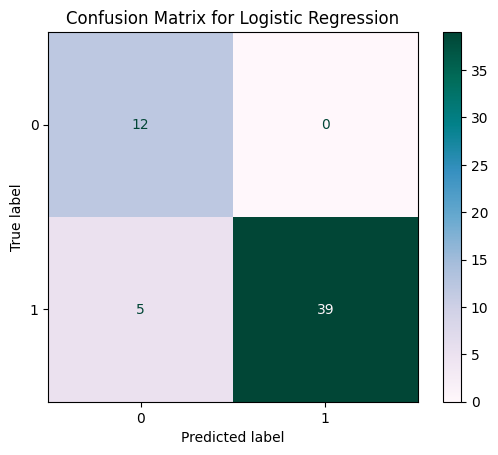

Training and Evaluating Model: Support Vector Classifier
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.95      0.95      0.95        44

    accuracy                           0.93        56
   macro avg       0.89      0.89      0.89        56
weighted avg       0.93      0.93      0.93        56



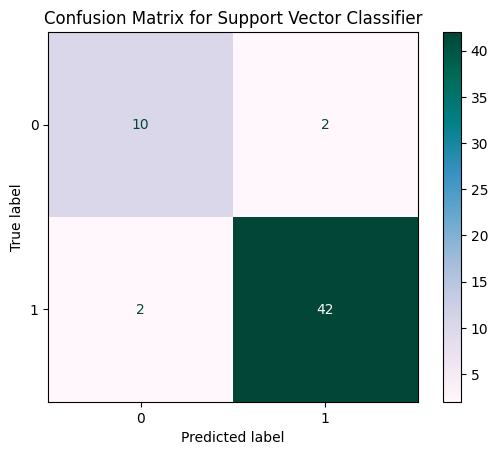

Training and Evaluating Model: K-Nearest Neighbors
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80        12
           1       1.00      0.86      0.93        44

    accuracy                           0.89        56
   macro avg       0.83      0.93      0.86        56
weighted avg       0.93      0.89      0.90        56



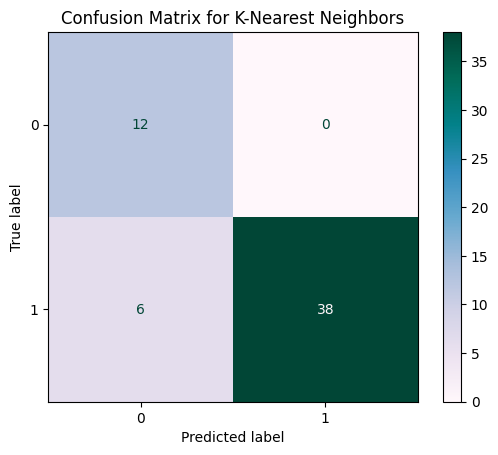

Training and Evaluating Model: Gaussian Naive Bayes
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.96      0.98      0.97        44

    accuracy                           0.95        56
   macro avg       0.93      0.91      0.92        56
weighted avg       0.95      0.95      0.95        56



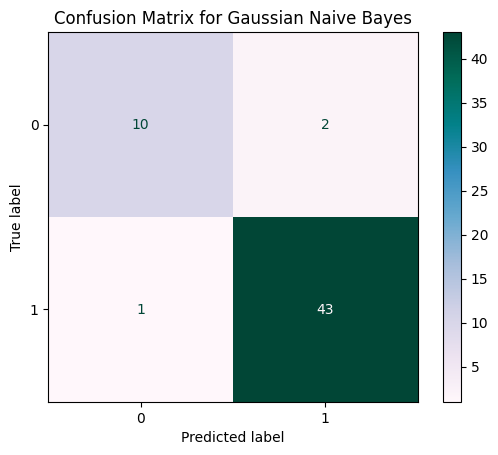

Training and Evaluating Model: Decision Tree
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.58      0.67        12
           1       0.89      0.95      0.92        44

    accuracy                           0.88        56
   macro avg       0.84      0.77      0.79        56
weighted avg       0.87      0.88      0.87        56



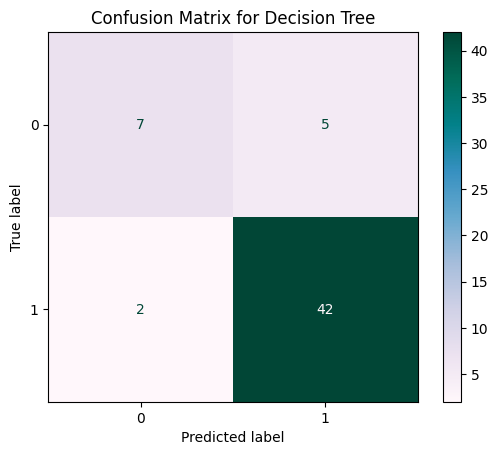

Training and Evaluating Model: Random Forest
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.58      0.74        12
           1       0.90      1.00      0.95        44

    accuracy                           0.91        56
   macro avg       0.95      0.79      0.84        56
weighted avg       0.92      0.91      0.90        56



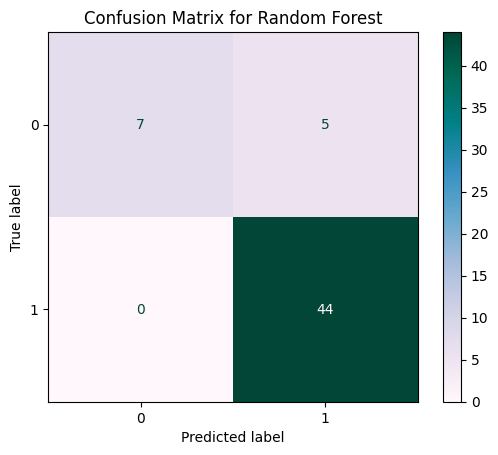

Training and Evaluating Model: Gradient Boosting
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        12
           1       0.88      1.00      0.94        44

    accuracy                           0.89        56
   macro avg       0.94      0.75      0.80        56
weighted avg       0.91      0.89      0.88        56



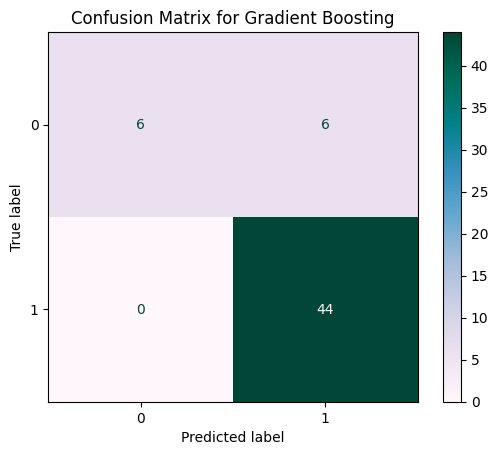

Training and Evaluating Model: XGBoost
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        12
           1       0.88      1.00      0.94        44

    accuracy                           0.89        56
   macro avg       0.94      0.75      0.80        56
weighted avg       0.91      0.89      0.88        56



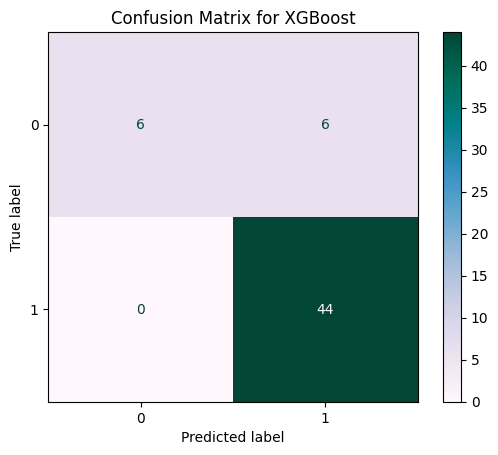


Model Evaluation Summary:
                       Model  Accuracy       AUC
0        Logistic Regression  0.910714  0.971591
1  Support Vector Classifier  0.928571  0.975379
2        K-Nearest Neighbors  0.892857  0.926136
3       Gaussian Naive Bayes  0.946429  0.916667
4              Decision Tree  0.875000  0.768939
5              Random Forest  0.910714  0.967803
6          Gradient Boosting  0.892857  0.971591
7                    XGBoost  0.892857  0.981061


In [41]:
import joblib


def evaluate_models(models, X_train, X_test, y_train, y_test):
    evaluation_summary = []
    
    for name, model in models.items():
        print(f"Training and Evaluating Model: {name}\n{'-'*50}")
        
        # Train the model
        model.fit(X_train, y_train)
        # Save the trained model
        joblib.dump(model, 'lung_cancer_model.sav')
        # Predict on the test set
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"
        
        # Append metrics to summary
        evaluation_summary.append({
            "Model": name,
            "Accuracy": accuracy,
            "AUC": auc if auc != "N/A" else "N/A"
        })
        
        # Display classification report
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        
        # Plot confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
        disp.plot(cmap='PuBuGn', values_format='d')
        plt.title(f"Confusion Matrix for {name}")
        plt.show()
        
    # Display evaluation summary
    summary_df = pd.DataFrame(evaluation_summary)
    print("\nModel Evaluation Summary:")
    print(summary_df)
    return summary_df

evaluation_summary = evaluate_models(models, X_train_resampled, X_val_scaled, y_train_resampled, y_val)


## Cross-Validation Results

In [35]:
def cross_validation_accuracy(models, X, y, cv=5):
    cv_results = []

    for name, model in models.items():
        print(f"Cross-validating model: {name}...")
        scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
        cv_results.append({
            "Model": name,
            "Mean Accuracy": scores.mean(),
            "Std Deviation": scores.std()
        })
        print(f"{name}: Mean Accuracy = {scores.mean():.4f}, Std Dev = {scores.std():.4f}")
        
    # Convert results to a DataFrame for better visualization
    cv_results_df = pd.DataFrame(cv_results)
    print("\nCross-Validation Results:")
    print(cv_results_df)
    return cv_results_df

cv_results = cross_validation_accuracy(models, X_train_scaled, y_train, cv=5)


Cross-validating model: Logistic Regression...
Logistic Regression: Mean Accuracy = 0.9136, Std Dev = 0.0223
Cross-validating model: Support Vector Classifier...
Support Vector Classifier: Mean Accuracy = 0.8864, Std Dev = 0.0287
Cross-validating model: K-Nearest Neighbors...
K-Nearest Neighbors: Mean Accuracy = 0.8955, Std Dev = 0.0308
Cross-validating model: Gaussian Naive Bayes...
Gaussian Naive Bayes: Mean Accuracy = 0.8727, Std Dev = 0.0490
Cross-validating model: Decision Tree...
Decision Tree: Mean Accuracy = 0.8864, Std Dev = 0.0287
Cross-validating model: Random Forest...
Random Forest: Mean Accuracy = 0.8909, Std Dev = 0.0391
Cross-validating model: Gradient Boosting...
Gradient Boosting: Mean Accuracy = 0.8727, Std Dev = 0.0468
Cross-validating model: XGBoost...


AttributeError: 'super' object has no attribute '__sklearn_tags__'

#### **Selecting the Best Model**

Based on the results of both evaluation metrics (accuracy, AUC) and cross-validation mean accuracy, structured approach to selecting the best model:


#### **Criteria for Best Model Selection**
1. **High Accuracy and AUC**:
   - Logistic Regression, Support Vector Classifier, and Gaussian Naive Bayes perform well in terms of accuracy and AUC.

2. **Consistency (Cross-Validation)**:
   - Logistic Regression has the highest mean cross-validation accuracy (91.36%) with a low standard deviation (2.23%).
   - Random Forest and KNN also show good consistency.

3. **Precision and Recall for Minority Class**:
   - Models like Logistic Regression, SVC, and Gaussian Naive Bayes demonstrate balanced precision-recall for the minority class (`0`).

#### **Recommended Best Model**
- **Logistic Regression**:
  - High evaluation metrics (Accuracy = 91%, AUC = 97.1%).
  - Best cross-validation performance (91.36% mean accuracy, 2.23% std dev).
  - Simple, interpretable, and effective for this dataset.

- **Support Vector Classifier (SVC)**:
  - Excellent evaluation metrics (Accuracy = 92.9%, AUC = 97.5%).
  - Slightly lower cross-validation consistency (88.64% mean accuracy).


<div style="border-radius: 15px; border: 2px solid #6A1B9A; padding: 20px; background: linear-gradient(135deg, #f1a0a1, #4c7cba); text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); font-weight: bold; margin-bottom: 10px; font-size: 28px; font-family: 'Roboto', sans-serif;">
        🙏 Thanks for Reading! 🚀
    </h1>
    <p style="color: #ffffff; font-size: 18px; text-align: center;">
        If you found this helpful, please upvote and share your thoughts!
    </p>
    <p style="color: #ffffff; font-size: 18px; text-align: center;">
        Happy Coding! 🙌😊
    </p>
</div>

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">
